## Libraries

In [40]:
!pip install datasets
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
!pip install spacy
!pip install gensim
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\urvas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\urvas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\urvas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
# Importing Hugging Face Data
import datasets
import os
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Text Preprocessing and Analysis
import string
from collections import Counter
import re
import json
from tqdm import tqdm  # Import the tqdm module
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

# NLP
import gensim
import gensim.downloader as api
from gensim.models import Word2Vec
from gensim.models import FastText
from gensim.models.word2vec import LineSentence
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import spacy
from spacy import displacy
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.training.example import Example

# PyTorch
import torch
import pandas as pd
from torch.utils.data import DataLoader, Dataset

# Additional Libraries
from collections import defaultdict, Counter
from sklearn.metrics.pairwise import cosine_similarity

## Importing Data

In [42]:
df = datasets.load_dataset("yelp_polarity") # Loading the data from hugging face datasets

Found cached dataset yelp_polarity (C:/Users/urvas/.cache/huggingface/datasets/yelp_polarity/plain_text/1.0.0/14f90415c754f47cf9087eadac25823a395fef4400c7903c5897f55cfaaa6f61)


  0%|          | 0/2 [00:00<?, ?it/s]

In [43]:
df

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 560000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 38000
    })
})

In [44]:
train_df = df["train"] # Loading split part of data (train part)
train_df = pd.DataFrame(train_df) # Converting into dataframe
train_df = train_df.iloc[:100000, :]
train_df.head() # Displaying the first 5 rows of train data

text  label
0  Unfortunately, the frustration of being Dr. Go...      0
1  Been going to Dr. Goldberg for over 10 years. ...      1
2  I don't know what Dr. Goldberg was like before...      0
3  I'm writing this review to give you a heads up...      0
4  All the food is great here. But the best thing...      1

In [48]:
train_df["text"].head(500).to_csv("text_file.txt", header=False, index=False) # Considering only 500 rows for labelling

In [49]:
test_df = df["test"] # Loading split part of data (test part)
test_df = pd.DataFrame(test_df) # Converting the data into a dataframe
test_df = test_df.iloc[:10000, :] # Selecting less rows for hardware complexity barrier
test_df.head() # Displaying first 5 rows of test data

text  label
0  Contrary to other reviews, I have zero complai...      1
1  Last summer I had an appointment to get new ti...      0
2  Friendly staff, same starbucks fair you get an...      1
3  The food is good. Unfortunately the service is...      0
4  Even when we didn't have a car Filene's Baseme...      1

## Analysis

### Explanatory Data Analysis

#### Basic EDA

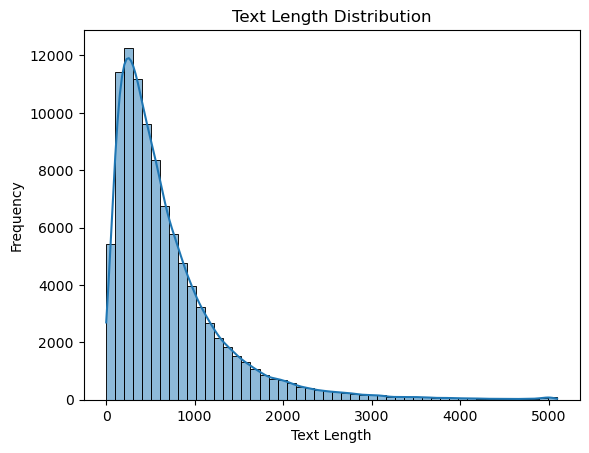

In [18]:
# Text Length Histogram
train_df['text_length'] = train_df['text'].apply(len)
sns.histplot(data=train_df, x='text_length', kde=True, bins=50)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [19]:
train_df = train_df.drop('text_length', axis=1)

In [20]:
train_df.head()

text  label
0  Unfortunately, the frustration of being Dr. Go...      0
1  Been going to Dr. Goldberg for over 10 years. ...      1
2  I don't know what Dr. Goldberg was like before...      0
3  I'm writing this review to give you a heads up...      0
4  All the food is great here. But the best thing...      1

### NER Analysis

In [21]:
!python -m spacy download en_core_web_lg

     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     ---------------------------------------- 0.2/587.7 MB 3.5 MB/s eta 0:02:49
     ---------------------------------------- 0.4/587.7 MB 3.8 MB/s eta 0:02:37
     ---------------------------------------- 0.4/587.7 MB 3.8 MB/s eta 0:02:37
     ---------------------------------------- 0.7/587.7 MB 3.7 MB/s eta 0:02:40
     ---------------------------------------- 1.0/587.7 MB 3.8 MB/s eta 0:02:35
     ---------------------------------------- 1.1/587.7 MB 3.9 MB/s eta 0:02:31
     ---------------------------------------- 1.3/587.7 MB 3.6 MB/s eta 0:02:44
     ---------------------------------------- 1.5/587.7 MB 3.9 MB/s eta 0:02:32
     ---------------------------------------- 1.6/587.7 MB 3.8 MB/s eta 0:02:36
     ---------------------------------------- 1.9/587.7 MB 3.9 MB/s eta 0:02:33
     ---------------------------------------- 2.0/587.7 MB 3.8 MB/s eta 0:02:35
     ---------------------------------------- 2

In [22]:
nlp = spacy.load("en_core_web_lg")
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [23]:
file_path = 'text_file.txt'
with open(file_path, 'r') as file:
    text = file.read()

# Process the text with spaCy
d = nlp(text)

# Render named entities using displacy
displacy.render(d, style="ent", jupyter=True)

In [24]:
for e in d.ents[:10]:
  print(f"Name of the entity {e.text} type is {e.label_}")

Name of the entity Goldberg type is PERSON
Name of the entity NYC type is GPE
Name of the entity 2 hours type is TIME
Name of the entity Goldberg type is PERSON
Name of the entity 2 type is CARDINAL
Name of the entity Goldberg type is PERSON
Name of the entity 10 years type is DATE
Name of the entity one type is CARDINAL
Name of the entity 1st type is ORDINAL
Name of the entity MHMG type is ORG


In [25]:
unique_labels = set()   # Entities of the spacy model
for e in d.ents:
    unique_labels.add(e.label_)
print("Entity Label Type: ", unique_labels)

Entity Label Type:  {'PERCENT', 'WORK_OF_ART', 'LAW', 'ORG', 'GPE', 'MONEY', 'ORDINAL', 'EVENT', 'QUANTITY', 'NORP', 'LOC', 'FAC', 'LANGUAGE', 'PERSON', 'TIME', 'DATE', 'PRODUCT', 'CARDINAL'}


In [26]:
with open('annotations.json', 'r') as file: # labelled 500 reviews
    df = json.load(file)   # Custom NER mdoel
df['annotations'][:5]

[['"Unfortunately, the frustration of being Dr. Goldberg\'s patient is a repeat of the experience I\'ve had with so many other doctors in NYC -- good doctor, terrible staff.  It seems that his staff simply never answers the phone.  It usually takes 2 hours of repeated calling to get an answer.  Who has time for that or wants to deal with it?  I have run into this problem with many other doctors and I just don\'t get it.  You have office workers, you have patients with medical needs, why isn\'t anyone answering the phone?  It\'s incomprehensible and not work the aggravation.  It\'s with regret that I feel that I have to give Dr. Goldberg 2 stars."',
  {'entities': [[41, 53, 'DENTIST'],
    [122, 129, 'ORGANIZATION'],
    [133, 136, 'LOCATION'],
    [153, 168, 'SERVICE'],
    [244, 251, 'TIME'],
    [385, 392, 'DENTIST'],
    [623, 635, 'DENTIST']]}],
 ['"Been going to Dr. Goldberg for over 10 years. I think I was one of his 1st patients when he started at MHMG. He\'s been great over the

In [27]:
df

{'classes': ['ORGANIZATION',
  'DENTIST',
  'PRODUCT',
  'PERSON',
  'TIME',
  'RESTAURANT',
  'QUANTITY',
  'CUISINE',
  'PRICE',
  'LOCATION',
  'SERVICE',
  'DISEASE'],
 'annotations': [['"Unfortunately, the frustration of being Dr. Goldberg\'s patient is a repeat of the experience I\'ve had with so many other doctors in NYC -- good doctor, terrible staff.  It seems that his staff simply never answers the phone.  It usually takes 2 hours of repeated calling to get an answer.  Who has time for that or wants to deal with it?  I have run into this problem with many other doctors and I just don\'t get it.  You have office workers, you have patients with medical needs, why isn\'t anyone answering the phone?  It\'s incomprehensible and not work the aggravation.  It\'s with regret that I feel that I have to give Dr. Goldberg 2 stars."',
   {'entities': [[41, 53, 'DENTIST'],
     [122, 129, 'ORGANIZATION'],
     [133, 136, 'LOCATION'],
     [153, 168, 'SERVICE'],
     [244, 251, 'TIME'],
  

In [28]:
classes_list = []
for i in df['classes']:
  print(i, end = ", ")
  classes_list.append(i)

ORGANIZATION, DENTIST, PRODUCT, PERSON, TIME, RESTAURANT, QUANTITY, CUISINE, PRICE, LOCATION, SERVICE, DISEASE, 

In [29]:
training_data = df.copy()
training_data['classes'] = df['classes']
training_data['annotations'] = []

In [30]:
training_data

{'classes': ['ORGANIZATION',
  'DENTIST',
  'PRODUCT',
  'PERSON',
  'TIME',
  'RESTAURANT',
  'QUANTITY',
  'CUISINE',
  'PRICE',
  'LOCATION',
  'SERVICE',
  'DISEASE'],
 'annotations': []}

In [31]:
for text, annotation in df['annotations']:
    try:
        if text!="" and len(annotation['entities']) > 0:
            temp_dict = {}
            temp_dict['text'] = text
            temp_dict['entities'] = []
            for ent in annotation['entities']:
                start = ent[0]
                end = ent[1]
                label = ent[2].upper()
                temp_dict['entities'].append((start, end, label))
        training_data['annotations'].append(temp_dict)
    except:
        pass

In [32]:
print(training_data)

{'classes': ['ORGANIZATION', 'DENTIST', 'PRODUCT', 'PERSON', 'TIME', 'RESTAURANT', 'QUANTITY', 'CUISINE', 'PRICE', 'LOCATION', 'SERVICE', 'DISEASE'], 'annotations': [{'text': '"Unfortunately, the frustration of being Dr. Goldberg\'s patient is a repeat of the experience I\'ve had with so many other doctors in NYC -- good doctor, terrible staff.  It seems that his staff simply never answers the phone.  It usually takes 2 hours of repeated calling to get an answer.  Who has time for that or wants to deal with it?  I have run into this problem with many other doctors and I just don\'t get it.  You have office workers, you have patients with medical needs, why isn\'t anyone answering the phone?  It\'s incomprehensible and not work the aggravation.  It\'s with regret that I feel that I have to give Dr. Goldberg 2 stars."', 'entities': [(41, 53, 'DENTIST'), (122, 129, 'ORGANIZATION'), (133, 136, 'LOCATION'), (153, 168, 'SERVICE'), (244, 251, 'TIME'), (385, 392, 'DENTIST'), (623, 635, 'DENTIS

In [33]:
modelSpacy = None
n_iter = 150

In [34]:
if modelSpacy is not None:
    nlp = spacy.load(modelSpacy)
    print("Loaded model '%s'" % modelSpacy)
else:
    nlp = spacy.blank('en')
    print("Created blank 'en' model")

Created blank 'en' model


In [35]:
if 'ner' not in nlp.pipe_names:
    ner = nlp.add_pipe('ner')
else:
    ner = nlp.get_pipe('ner')

In [36]:
for annotations in training_data["annotations"]:
    for ent in annotations['entities']:
        ner.add_label(ent[2])

other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
with nlp.disable_pipes(*other_pipes):  # only train NER
    optimizer = nlp.begin_training()
    for itn in range(n_iter):
        losses = {}
        for text, annotations in tqdm(df["annotations"]):
            try:
                if text!="":
                    example = Example.from_dict(nlp.make_doc(text), annotations)
                
                    nlp.update(
                        [example],
                        drop=0.5,
                        sgd=optimizer,
                        losses=losses)
            except:
                pass
        print(losses)

  1%|▋                                                                                 | 4/503 [00:00<00:37, 13.39it/s]C:\Users\urvas\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text ""All the food is great here. But the best thing th..." with entities "[[9, 13, 'PRODUCT'], [67, 73, 'PRODUCT'], [80, 85,...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
  3%|██▍                                                                              | 15/503 [00:00<00:30, 15.77it/s]C:\Users\urvas\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text ""Used to go there for tires, brakes, etc.  Their p..." with entities "[[22, 27, 'PRODUCT'], [29, 35, 'PRODUCT'], [74, 77...". Use `spacy.training.offsets_to_biluo_tags(nlp.mak

{'ner': 4359.259953022245}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 28.48it/s]


{'ner': 2329.4818609588415}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 28.30it/s]


{'ner': 2172.7290460724225}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:20<00:00, 24.82it/s]


{'ner': 2149.4177536480415}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 32.11it/s]


{'ner': 2206.1879374275786}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 31.88it/s]


{'ner': 2017.5139102328083}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.81it/s]


{'ner': 2011.3936124777179}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 29.47it/s]


{'ner': 1930.1630525505307}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 29.58it/s]


{'ner': 1830.7527933161114}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 29.03it/s]


{'ner': 1893.7603120780404}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 31.72it/s]


{'ner': 1872.9611802579823}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 31.84it/s]


{'ner': 1891.325587327778}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 31.51it/s]


{'ner': 1728.5197255062883}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.77it/s]


{'ner': 1724.6596729588985}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:18<00:00, 27.40it/s]


{'ner': 1632.3499322221924}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:22<00:00, 22.50it/s]


{'ner': 1813.7607585631802}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 29.95it/s]


{'ner': 1725.0373652737635}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.64it/s]


{'ner': 1699.5738290061508}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 31.14it/s]


{'ner': 1603.693208132473}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 32.21it/s]


{'ner': 1605.3427292057058}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 32.06it/s]


{'ner': 1618.6932843200998}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 32.38it/s]


{'ner': 1519.400375991455}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 31.76it/s]


{'ner': 1531.4781588533351}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.66it/s]


{'ner': 1542.383148990719}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 31.40it/s]


{'ner': 1480.0501670183767}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 31.81it/s]


{'ner': 1754.7643474444528}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 31.03it/s]


{'ner': 1481.8385353645085}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.49it/s]


{'ner': 1431.6919098929015}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 29.34it/s]


{'ner': 1414.919808955047}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.23it/s]


{'ner': 1399.836736867954}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 28.98it/s]


{'ner': 1426.6856743542692}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.06it/s]


{'ner': 1354.460093309871}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 28.69it/s]


{'ner': 1353.3735756209437}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 29.13it/s]


{'ner': 1358.801768426664}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 29.06it/s]


{'ner': 1380.8292917001654}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 28.02it/s]


{'ner': 1242.7914926081332}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 29.95it/s]


{'ner': 1265.5808219740036}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 29.55it/s]


{'ner': 1276.1902628862617}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 31.81it/s]


{'ner': 1309.7905765751268}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 32.05it/s]


{'ner': 1184.4250089382037}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 32.74it/s]


{'ner': 1283.951869580161}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 28.74it/s]


{'ner': 1312.9885368894877}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 29.81it/s]


{'ner': 1226.7189199924085}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 31.43it/s]


{'ner': 1276.2493893074186}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 29.79it/s]


{'ner': 1228.0145620041642}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 29.53it/s]


{'ner': 1264.7227567128846}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 28.99it/s]


{'ner': 1188.305935994003}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 29.79it/s]


{'ner': 1151.8279543152544}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 29.94it/s]


{'ner': 1166.497727550811}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 29.79it/s]


{'ner': 1204.8020865410335}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 29.58it/s]


{'ner': 1153.0889162443725}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 29.75it/s]


{'ner': 1177.6870327879815}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.31it/s]


{'ner': 1209.3711184027266}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.51it/s]


{'ner': 1126.540094590563}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 29.18it/s]


{'ner': 1175.5452769872454}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.79it/s]


{'ner': 1147.8809225492655}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.90it/s]


{'ner': 1182.7916752475255}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 31.09it/s]


{'ner': 1088.5863872713205}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.92it/s]


{'ner': 1105.5947864521784}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.17it/s]


{'ner': 1052.9090655293573}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 29.53it/s]


{'ner': 1025.7321629456817}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:18<00:00, 27.93it/s]


{'ner': 1077.4368428228863}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:18<00:00, 27.40it/s]


{'ner': 1057.947810534036}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 29.18it/s]


{'ner': 1081.9963422427238}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:18<00:00, 27.76it/s]


{'ner': 1101.0971655933001}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:18<00:00, 27.35it/s]


{'ner': 1034.2468336801126}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 28.21it/s]


{'ner': 983.7418500802762}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:18<00:00, 27.46it/s]


{'ner': 1022.0441443672463}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:18<00:00, 26.94it/s]


{'ner': 1043.0355099944416}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:18<00:00, 27.10it/s]


{'ner': 955.8313900183007}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:18<00:00, 27.64it/s]


{'ner': 1002.4274961775011}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 28.55it/s]


{'ner': 997.5663141011499}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:18<00:00, 27.85it/s]


{'ner': 966.5014443141365}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:18<00:00, 27.35it/s]


{'ner': 960.5667831228577}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:18<00:00, 27.33it/s]


{'ner': 985.3320822714101}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 28.18it/s]


{'ner': 1098.7116569034474}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 31.24it/s]


{'ner': 952.4071185487198}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 33.33it/s]


{'ner': 925.6696902702386}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 31.77it/s]


{'ner': 946.3445460610698}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:19<00:00, 25.81it/s]


{'ner': 913.5037127278326}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 29.15it/s]


{'ner': 961.7998292566821}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 29.93it/s]


{'ner': 889.3113781822743}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.82it/s]


{'ner': 928.7297072608799}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.01it/s]


{'ner': 878.675026848939}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 31.89it/s]


{'ner': 1022.9769153169516}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 31.20it/s]


{'ner': 892.8718469391383}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 31.29it/s]


{'ner': 876.2547184815971}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.13it/s]


{'ner': 885.8288292004382}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.25it/s]


{'ner': 869.5500104918863}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 32.46it/s]


{'ner': 897.641875494607}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 28.75it/s]


{'ner': 861.85667612078}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:18<00:00, 26.81it/s]


{'ner': 868.1120417380108}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 28.03it/s]


{'ner': 883.326131455383}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 29.69it/s]


{'ner': 851.2241421144523}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.11it/s]


{'ner': 849.3250708648562}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 29.47it/s]


{'ner': 849.7394760907904}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.02it/s]


{'ner': 860.0183643779319}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.71it/s]


{'ner': 853.07553344741}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.45it/s]


{'ner': 835.9993246228851}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 29.16it/s]


{'ner': 812.4853561558824}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 29.77it/s]


{'ner': 819.555894008236}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.17it/s]


{'ner': 800.6476905739655}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 29.97it/s]


{'ner': 771.8682110680621}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.77it/s]


{'ner': 832.585779596703}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 31.57it/s]


{'ner': 840.8428922077201}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 32.66it/s]


{'ner': 775.9055159314809}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 31.82it/s]


{'ner': 797.0055054078059}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.11it/s]


{'ner': 793.4762551288217}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.80it/s]


{'ner': 829.9082864719876}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 31.97it/s]


{'ner': 786.9645629008742}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 31.05it/s]


{'ner': 771.9001612968206}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.72it/s]


{'ner': 820.7537867206123}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.14it/s]


{'ner': 765.3157414203494}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 31.70it/s]


{'ner': 743.9152680266417}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.38it/s]


{'ner': 738.8825810001741}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.42it/s]


{'ner': 758.2147068760817}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.70it/s]


{'ner': 778.1654326490276}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.97it/s]


{'ner': 734.1516417793678}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.28it/s]


{'ner': 772.0506327678672}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 31.55it/s]


{'ner': 823.9629695787471}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.46it/s]


{'ner': 842.5572567201581}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 29.54it/s]


{'ner': 816.6756689228063}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.41it/s]


{'ner': 775.5893678402547}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.37it/s]


{'ner': 702.647716386236}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.78it/s]


{'ner': 760.8133705617624}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 31.54it/s]


{'ner': 797.3758458988833}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.59it/s]


{'ner': 761.2816006680658}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 31.31it/s]


{'ner': 682.9475099522618}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 32.08it/s]


{'ner': 737.6584627153134}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 31.21it/s]


{'ner': 761.465248516248}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 31.62it/s]


{'ner': 722.0414424429697}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 31.40it/s]


{'ner': 720.4357938888784}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.52it/s]


{'ner': 757.450679212863}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 32.36it/s]


{'ner': 763.8299764896533}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 31.68it/s]


{'ner': 770.9680343355438}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 31.17it/s]


{'ner': 750.2003675274811}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.04it/s]


{'ner': 694.9699072650054}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 31.62it/s]


{'ner': 711.2957495476039}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 32.35it/s]


{'ner': 738.5653351619603}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 31.46it/s]


{'ner': 711.2001126819897}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 32.90it/s]


{'ner': 755.0851220392401}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 31.62it/s]


{'ner': 756.7432623564872}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:18<00:00, 27.76it/s]


{'ner': 653.4150785877914}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 29.49it/s]


{'ner': 676.6953016398688}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.97it/s]


{'ner': 718.4285070837064}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 28.64it/s]


{'ner': 640.4710251352653}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:17<00:00, 28.95it/s]


{'ner': 650.546222044987}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 30.73it/s]


{'ner': 670.9004004926229}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:16<00:00, 31.30it/s]


{'ner': 647.4911393167057}


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:15<00:00, 32.21it/s]

{'ner': 662.6732557820573}


In [37]:
for annotations in training_data["annotations"][-100:]:
    doc = nlp(annotations['text'])
    print('Entities', [(ent.text, ent.label_) for ent in doc.ents])
    print('Tokens', [(t.text, t.ent_type_, t.ent_iob) for t in doc])

Entities [('Dangerously dirty', 'SERVICE')]
Tokens [('Dangerously', 'SERVICE', 3), ('dirty', 'SERVICE', 1), ('!', '', 2)]
Entities [('Rushed', 'SERVICE'), ('poor quality', 'SERVICE')]
Tokens [('Rushed', 'SERVICE', 3), ('and', '', 2), ('poor', 'SERVICE', 3), ('quality', 'SERVICE', 1), ('.', '', 2)]
Entities [('quick', 'SERVICE'), ('efficient.', 'SERVICE')]
Tokens [('Staff', '', 2), ('was', '', 2), ('quick', 'SERVICE', 3), ('and', '', 2), ('efficient', 'SERVICE', 3), ('.', 'SERVICE', 1), ('Food', '', 2), ('was', '', 2), ('delicious', '', 2), ('.', '', 2)]
Entities [('Great', 'SERVICE'), ('food.', 'PRODUCT')]
Tokens [('Great', 'SERVICE', 3), ('food', 'PRODUCT', 3), ('.', 'PRODUCT', 1), ('Great', '', 2), ('atmosphere', '', 2), ('.', '', 2), ('Great', '', 2), ('staff', '', 2), ('.', '', 2)]
Entities [('gluten free pizza', 'PRODUCT')]
Tokens [('Best', '', 2), ('gluten', 'PRODUCT', 3), ('free', 'PRODUCT', 1), ('pizza', 'PRODUCT', 1), ('ever', '', 2), ('!', '', 2), ('!', '', 2)]
Entities [('Pi

Entities [('food', 'PRODUCT'), ('friendly', 'SERVICE')]
Tokens [('Yummy', '', 2), ('food', 'PRODUCT', 3), (';', '', 2), ('great', '', 2), ('price', '', 2), (';', '', 2), ('friendly', 'SERVICE', 3), ('stuff', '', 2), ('.', '', 2)]
Entities [('Great', 'SERVICE')]
Tokens [('Great', 'SERVICE', 3), ('selection', '', 2), ('.', '', 2), (' ', '', 2), ('Food', '', 2), ('is', '', 2), ('ok', '', 2), ('.', '', 2)]
Entities [('best', 'SERVICE')]
Tokens [('Always', '', 2), ('the', '', 2), ('best', 'SERVICE', 3), ('!', '', 2), (' ', '', 2), ('LOVE', '', 2), ('this', '', 2), ('place', '', 2), ('.', '', 2)]
Entities [('wonderful experience', 'SERVICE'), ('prices are great', 'PRICE')]
Tokens [('Had', '', 2), ('a', '', 2), ('wonderful', 'SERVICE', 3), ('experience', 'SERVICE', 1), ('and', '', 2), ('prices', 'PRICE', 3), ('are', 'PRICE', 1), ('great', 'PRICE', 1), ('!', '', 2), ('!', '', 2)]
Entities [('5 minutes', 'TIME')]
Tokens [('Just', '', 2), ('had', '', 2), ('some', '', 2), ('about', '', 2), ('5', 

In [38]:
output_dir= os.path.abspath(os.getcwd())
nlp.to_disk(output_dir)
print("Saved model to", output_dir)

Saved model to C:\Users\urvas\Projects\NLP Project\Yelp Review Classification using NLP\Project


In [39]:
nlp2 = spacy.load(output_dir)
for annotations in training_data["annotations"][45:50]:
    doc = nlp2(annotations['text'])
    print('Entities', [(ent.text, ent.label_) for ent in doc.ents])
    print('Tokens', [(t.text, t.ent_type_, t.ent_iob) for t in doc])

Entities [('dentist', 'PRODUCT'), ('15 minutes', 'TIME'), ('Yelp', 'ORGANIZATION'), ('best', 'SERVICE'), ('two', 'QUANTITY'), ('9am', 'TIME'), ('8:50.', 'TIME'), ('2', 'TIME'), ('employees', 'PERSON'), ('disinterested', 'SERVICE'), ('office admin', 'PERSON'), ('best', 'SERVICE'), ('dentist', 'DENTIST'), ('entrance.\\n\\nPoor recommendation', 'SERVICE')]
Tokens [('"', '', 2), ('In', '', 2), ('all', '', 2), ('fairness', '', 2), ('-', '', 2), ('I', '', 2), ('did', '', 2), ('not', '', 2), ('see', '', 2), ('this', '', 2), ('dentist', 'PRODUCT', 3), ('but', '', 2), ('did', '', 2), ('schedule', '', 2), ('an', '', 2), ('appointment', '', 2), ('and', '', 2), ('waited', '', 2), ('15', 'TIME', 3), ('minutes', 'TIME', 1), ('for', '', 2), ('them', '', 2), ('to', '', 2), ('open.\\n\\nWhen', '', 2), ('I', '', 2), ('look', '', 2), ('at', '', 2), ('Yelp', 'ORGANIZATION', 3), ('reviews', '', 2), (',', '', 2), ('I', '', 2), ('usually', '', 2), ('weed', '', 2), ('out', '', 2), ('the', '', 2), ('outliers',

In [40]:
file = open('text file 500 rows.txt')
text = file.read()
file.close()
nlp2 = spacy.load(output_dir)
doc = nlp2(text)
displacy.render(doc, style="ent", jupyter=True)

### Deep EDA

In [48]:
nlp2 = spacy.load(r"C:\Users\urvas\Projects\NLP Project\Yelp Review Classification using NLP\Project")
print(nlp2)

In [49]:
def extract_named_entities(text_column):
    """
    Extract named entities from a list of text documents and return the top entities for each label.

    :param text_column: List of text documents
    :return: Tuple containing top entities and entity counts for each label
    """
    docs = list(nlp2.pipe(text_column))  # Processing each document in text_column

    named_entities = defaultdict(list)  # Initializing dictionaries to store named entities and their counts
    entity_counts = defaultdict(Counter)

    for doc in docs:  # Iterating through processed documents
        for ent in doc.ents:  # Extracting named entities in each document
            named_entities[ent.label_].append(ent.text)
            entity_counts[ent.label_][ent.text] += 1

    top_entities = {}  # Extracting top entities for each label based on their counts
    for label, counts in entity_counts.items():
        top_entities[label] = [entity for entity, count in counts.most_common(75)]

    return top_entities, entity_counts

In [50]:
def plot_top_entities(top_entities, entity_counts, label_to_plot, num_entities=15):
    # Sorting entities by frequency in descending order
    sorted_entities = sorted(top_entities[label_to_plot], key=lambda entity: entity_counts[label_to_plot][entity], reverse=True)

    # Extracting the top N (num_entities) entity names and their corresponding frequencies
    top_N_entities = sorted_entities[:num_entities]

    # Creating a bar graph
    plt.figure(figsize=(12, 6))
    plt.barh(top_N_entities, [entity_counts[label_to_plot][entity] for entity in top_N_entities])
    plt.xlabel('Frequency')
    plt.ylabel('Entity Name')
    plt.title(f'Top {num_entities} {label_to_plot} Entities and Their Frequencies')
    plt.gca().invert_yaxis()
    plt.show()

In [51]:
def get_top_entities_table(top_entities, entity_counts, label_to_plot, num_entities=15):
    # Sorting entities by frequency in descending order
    sorted_entities = sorted(top_entities[label_to_plot], key=lambda entity: entity_counts[label_to_plot][entity], reverse=True)

    # Extracting the top N (num_entities) entity names and their corresponding frequencies
    top_N_entities = sorted_entities[:num_entities]

    # Creating a DataFrame
    top_entities_df = pd.DataFrame({
        'Entity Name': top_N_entities,
        'Frequency': [entity_counts[label_to_plot][entity] for entity in top_N_entities]
    })

    return top_entities_df

In [52]:
train_df.head()

text  label
0  Unfortunately, the frustration of being Dr. Go...      0
1  Been going to Dr. Goldberg for over 10 years. ...      1
2  I don't know what Dr. Goldberg was like before...      0
3  I'm writing this review to give you a heads up...      0
4  All the food is great here. But the best thing...      1

In [53]:
train_df.shape

(100000, 2)

In [54]:
print(classes_list)

['ORGANIZATION', 'DENTIST', 'PRODUCT', 'PERSON', 'TIME', 'RESTAURANT', 'QUANTITY', 'CUISINE', 'PRICE', 'LOCATION', 'SERVICE', 'DISEASE']


##### Overall EDA

In [55]:
text_column = train_df["text"][:10000]
top_entities, entity_counts = extract_named_entities(text_column)

In [56]:
for label, entities in top_entities.items():  # Printing top entities for each label
    print(f"{label}: {entities}")

DENTIST: ['dentist', 'doctors', 'Discovery', 'Dr. Bebko', 'Dr. Marashi', 'Dr. Goldberg', 'doctor', 'Dr. Karner', 'Dr. Mathias', 'Dr. Pepper', 'Dr. Resek', 'Dr. Higgins', 'Dr. Ugland', 'Dr. Lind', 'Prairie', 'Dr. Johnson', 'Johnson', "doctor. He is only interested in the co-pay and having you come in for medication refills every month. He will not give refills and could less about patients's financial situations. Trying to get your 90 days", "Dr. Goldberg's", 'Doctor', 'Dr. Weinberg', 'Dr.Simard', 'Dr. Gerson', "Dr. Dorn's handling of", 'Dr. Dorn was excellent', 'Dr. Dorn understood', 'Dr. Dorn. I', 'Dr. Dorn', 'Mr. Manager', "doctor's office is 2,500 miles", 'large piece', 'St. Coffee branch', 'Guest member', 'Dr. Bebko charged', 'Dr. Bebko\'s \\""doom and gloom\\"', 'Dr. Bebko would', 'St. Patty', 'root beer', 'Kosher', 'Jorge', 'Dr. Miggins', 'Dr. Resek.', 'raptors', 'Dr. Arnold', 'Dr. W', 'Google fiber', 'Google Fiber', 'Dr. Morris', 'Dr. Palermo', "Dr. Brown's", "Dr. Marashi's", 'M

In [57]:
for label, entities in top_entities.items():  # Printing top entities for each label
    print(label)

DENTIST
LOCATION
SERVICE
TIME
ORGANIZATION
PERSON
PRODUCT
PRICE
QUANTITY
RESTAURANT
CUISINE
DISEASE


###### PLOTS

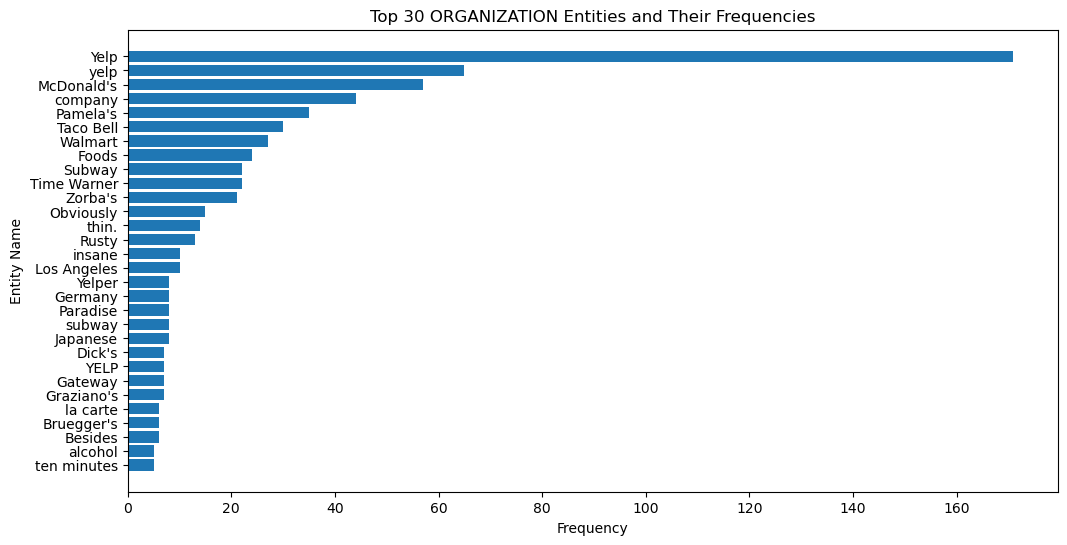


**********************************************************************



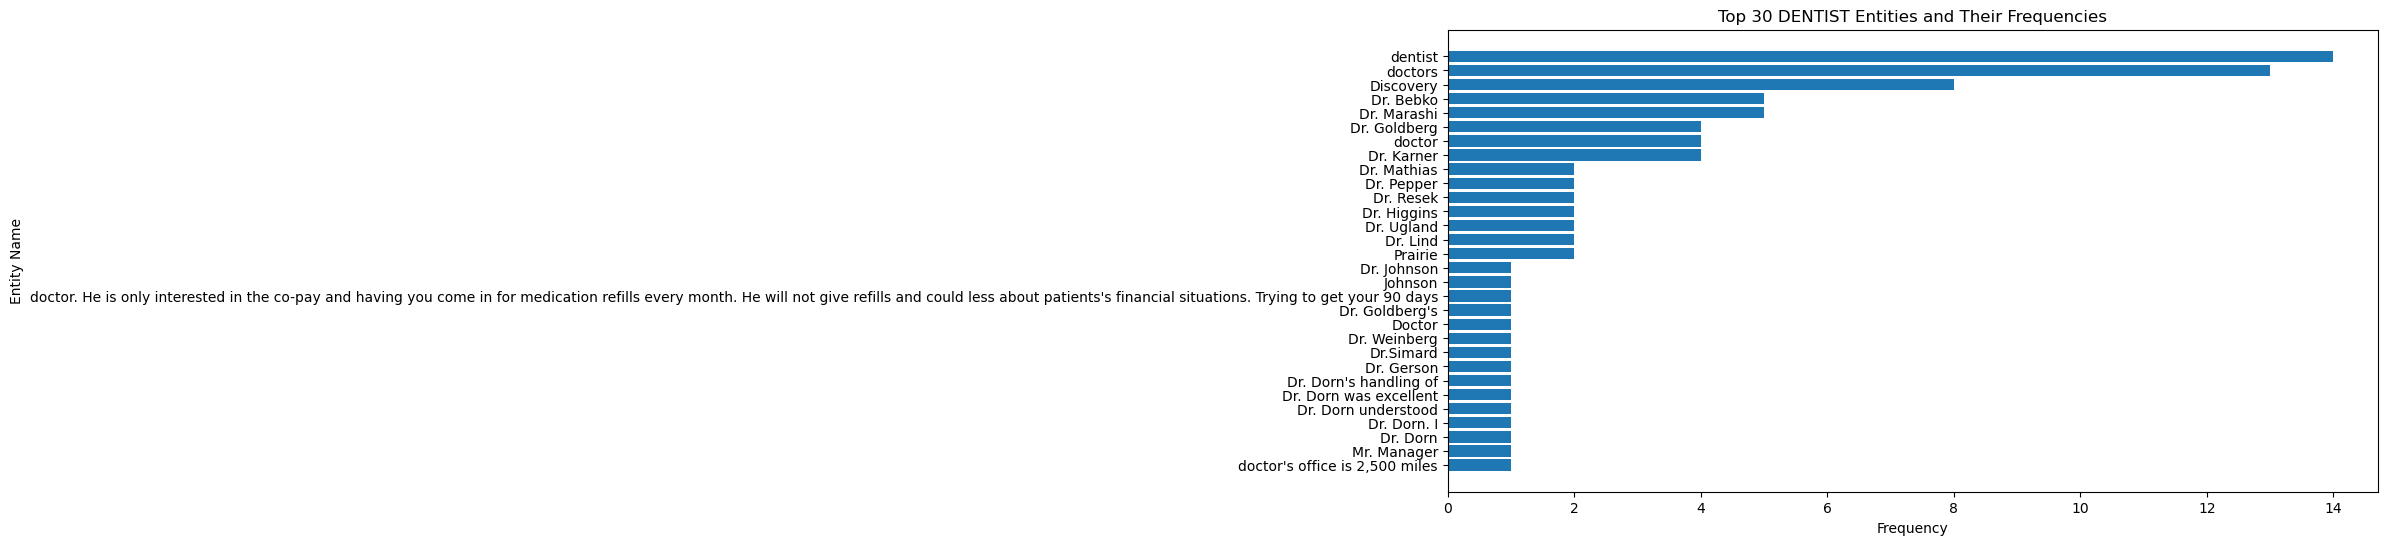


**********************************************************************



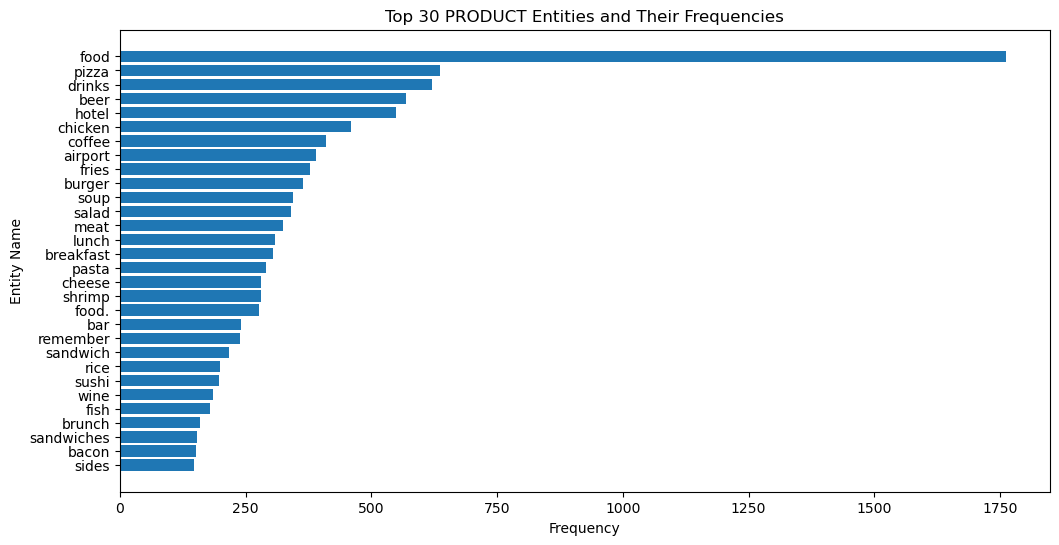


**********************************************************************



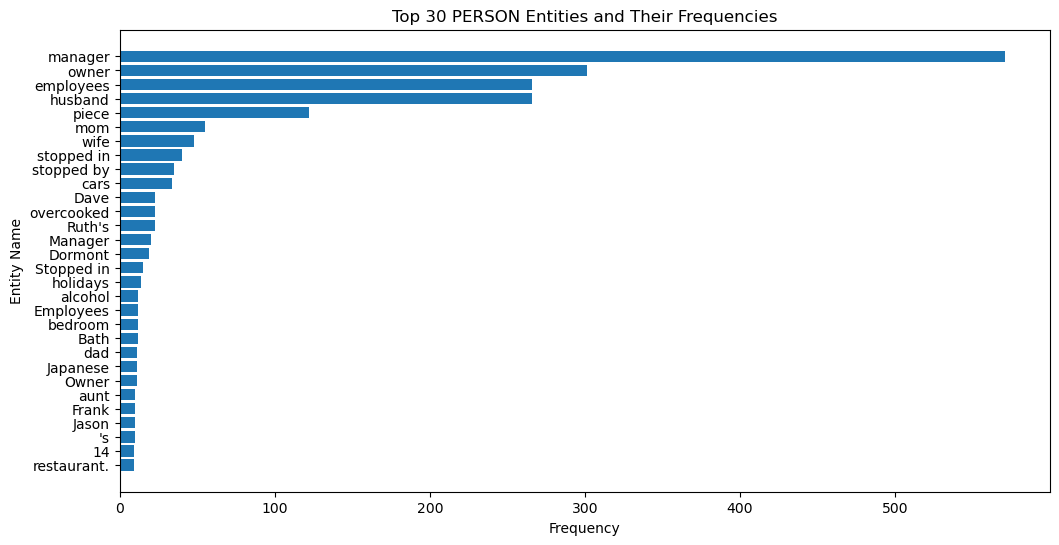


**********************************************************************



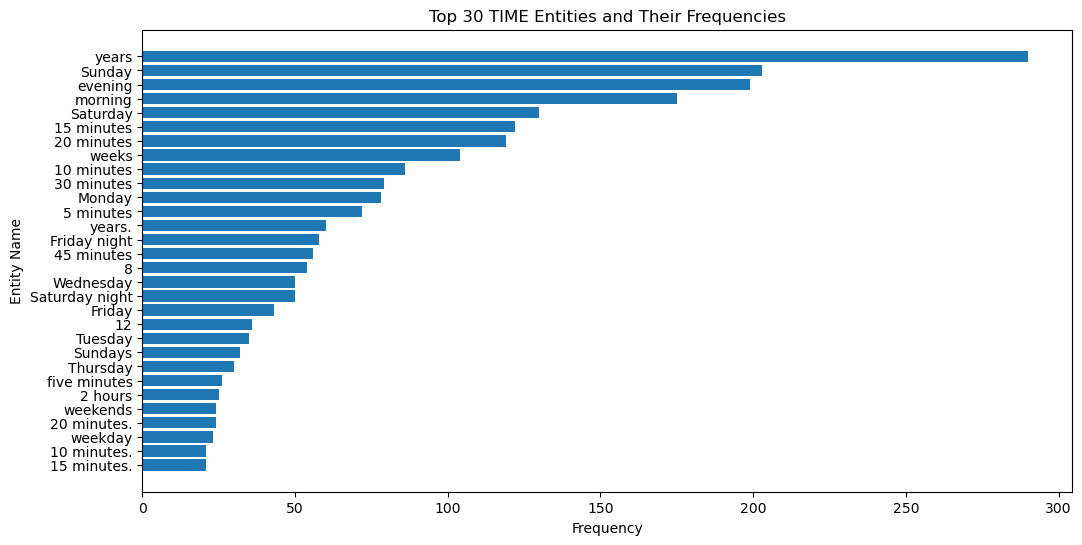


**********************************************************************



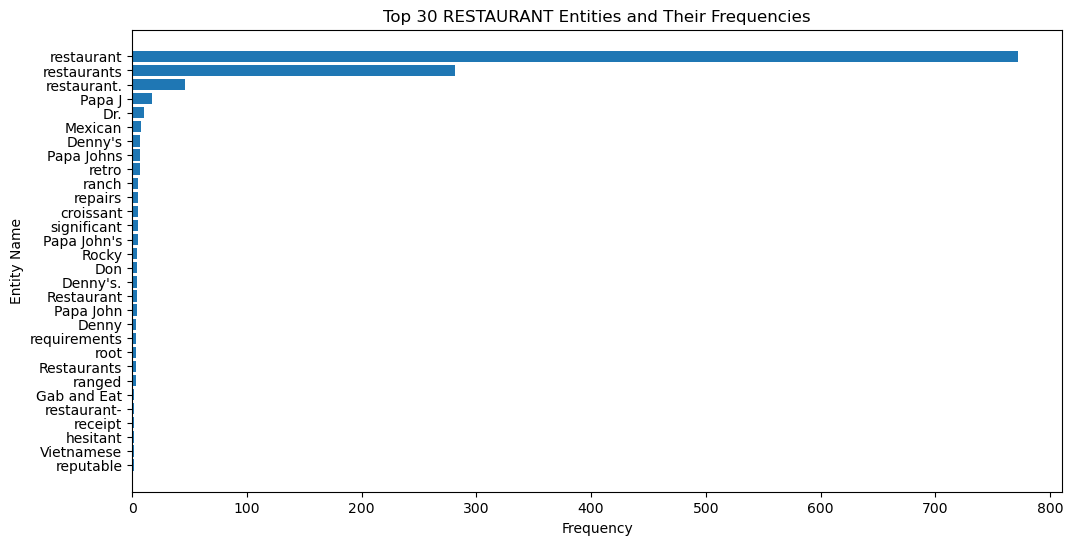


**********************************************************************



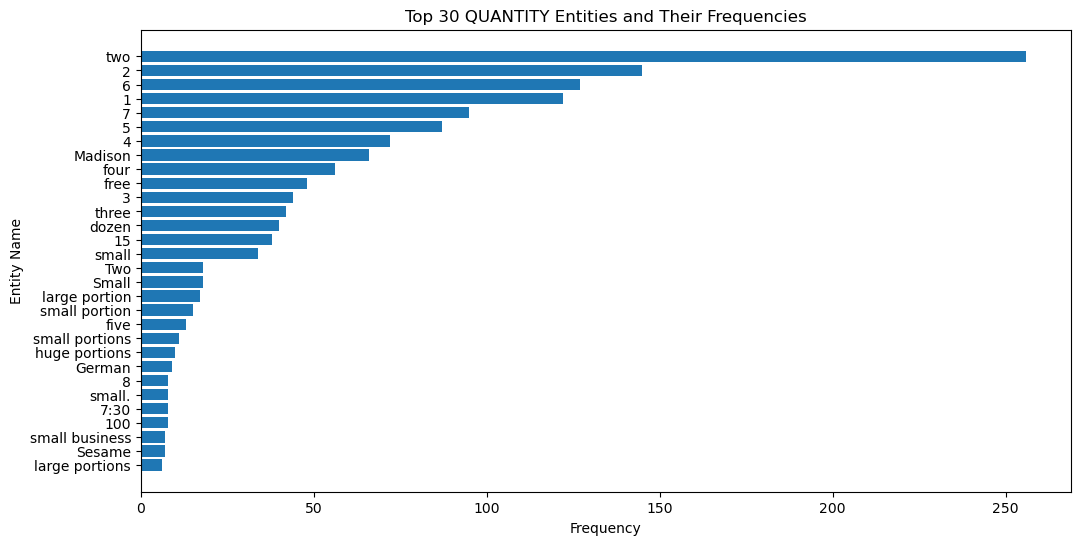


**********************************************************************



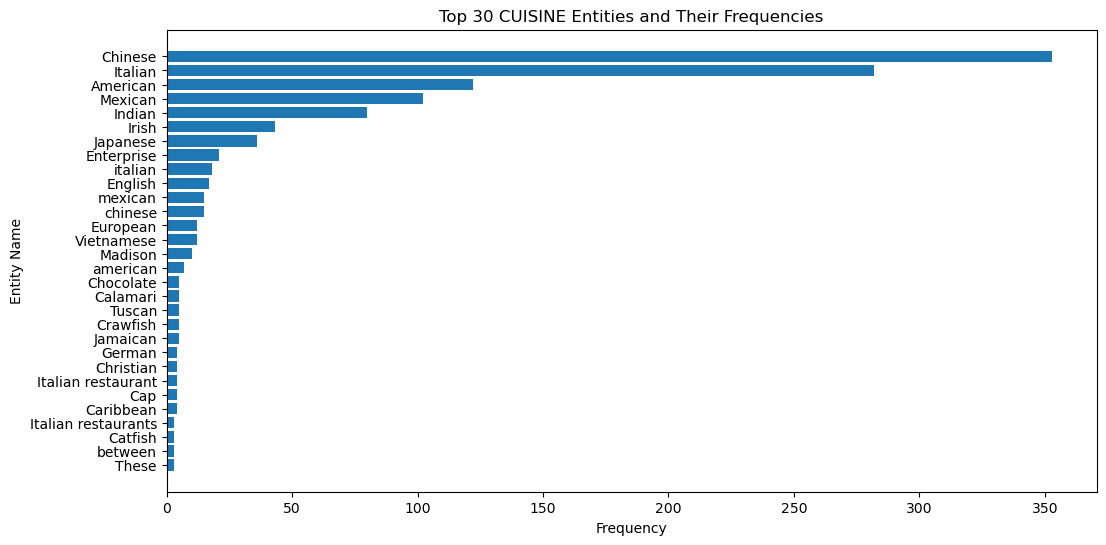


**********************************************************************



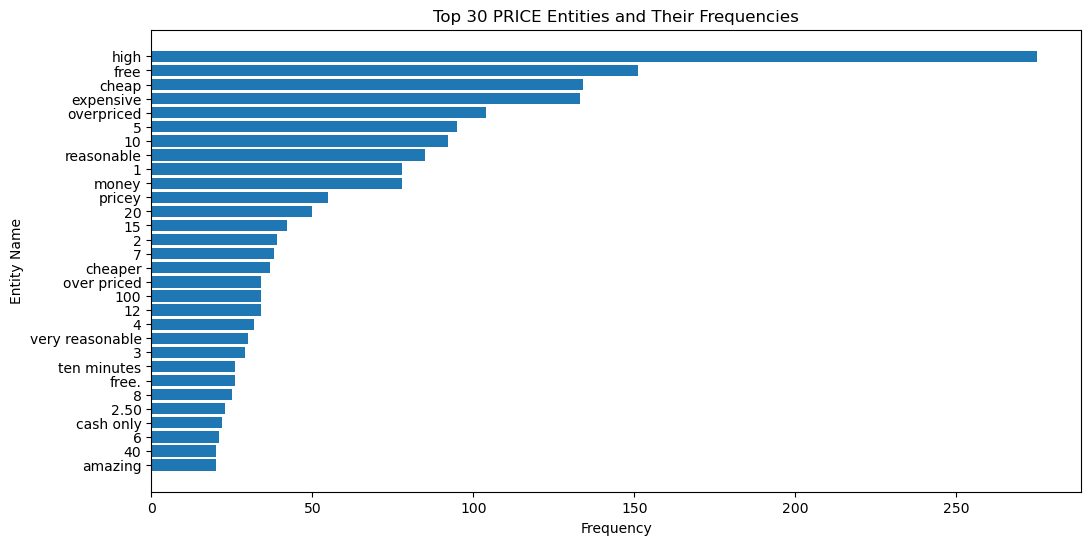


**********************************************************************



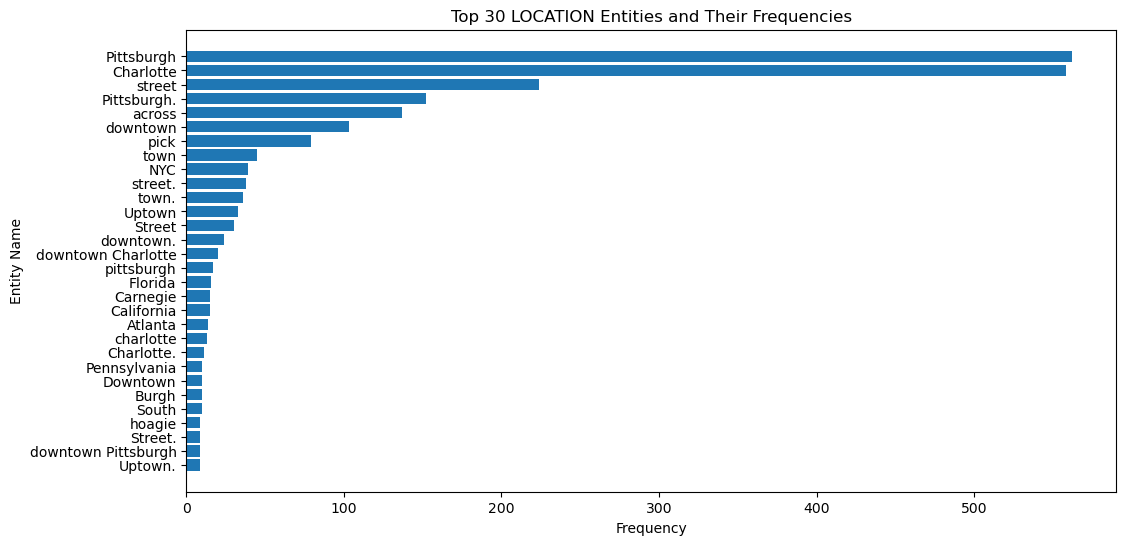


**********************************************************************



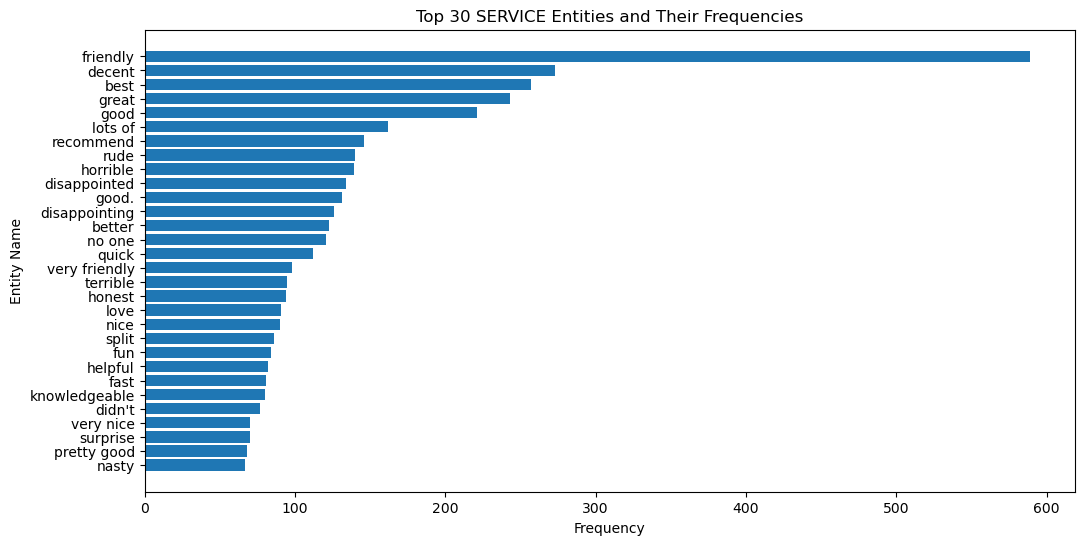


**********************************************************************



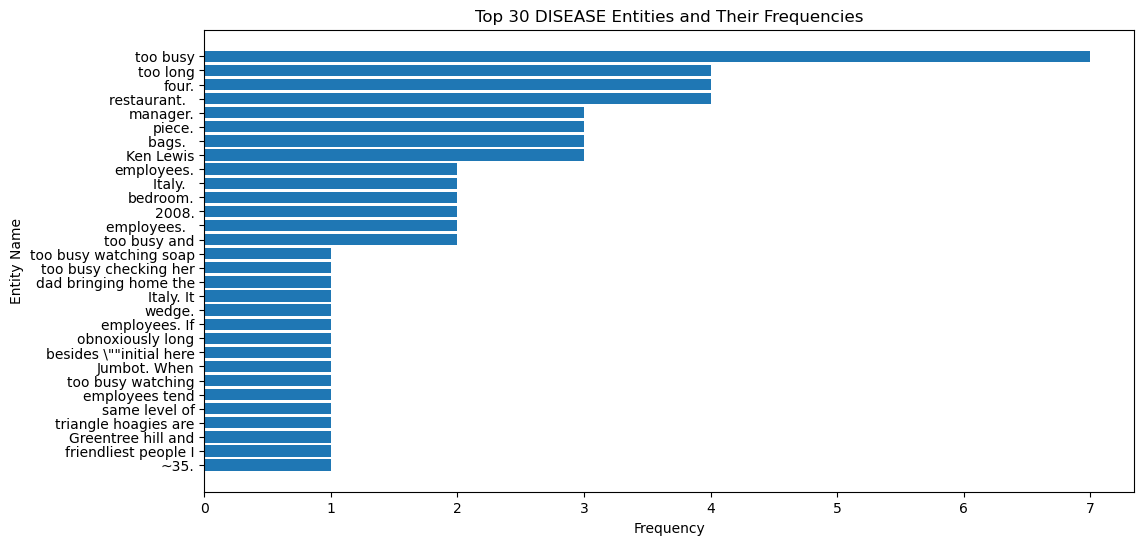


**********************************************************************



In [58]:
for i in classes_list:
  plot_top_entities(top_entities, entity_counts, i, num_entities=30)
  print("\n**********************************************************************\n")

###### Tables

In [59]:
for i in classes_list:
  table_df = get_top_entities_table(top_entities, entity_counts, i, num_entities=30)
  print(table_df)
  print("-----------------------------------------------------------------------")

    Entity Name  Frequency
0          Yelp        171
1          yelp         65
2    McDonald's         57
3       company         44
4      Pamela's         35
5     Taco Bell         30
6       Walmart         27
7         Foods         24
8        Subway         22
9   Time Warner         22
10      Zorba's         21
11    Obviously         15
12        thin.         14
13        Rusty         13
14       insane         10
15  Los Angeles         10
16       Yelper          8
17      Germany          8
18     Paradise          8
19       subway          8
20     Japanese          8
21       Dick's          7
22         YELP          7
23      Gateway          7
24   Graziano's          7
25     la carte          6
26   Bruegger's          6
27      Besides          6
28      alcohol          5
29  ten minutes          5
-----------------------------------------------------------------------
                                          Entity Name  Frequency
0                         

##### Positive EDA

In [60]:
text_column_positive = train_df[train_df["label"] == 1]["text"]
top_entities_positive, entity_counts_positive = extract_named_entities(text_column_positive)

###### PLOTS

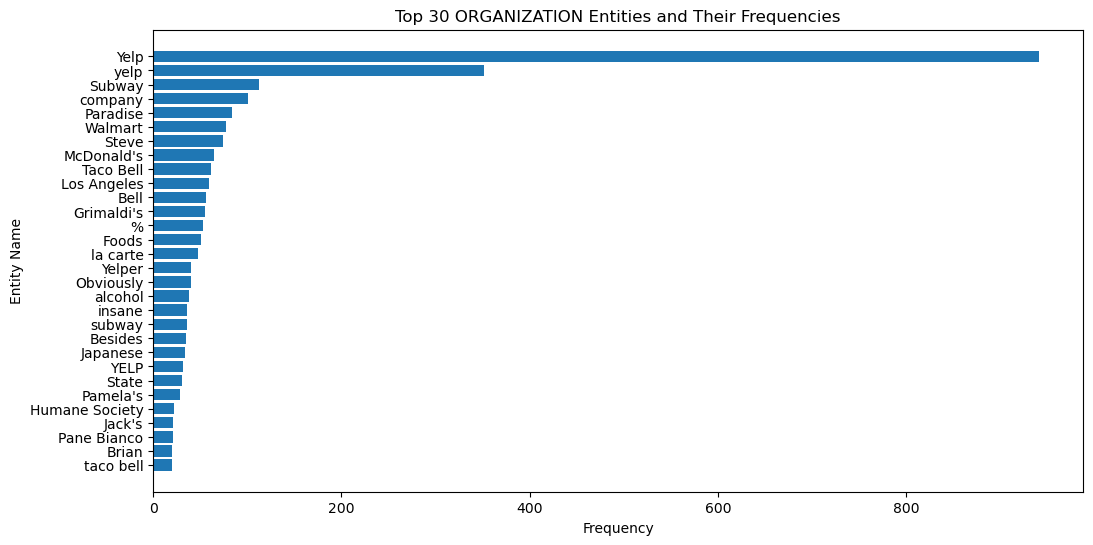


**********************************************************************



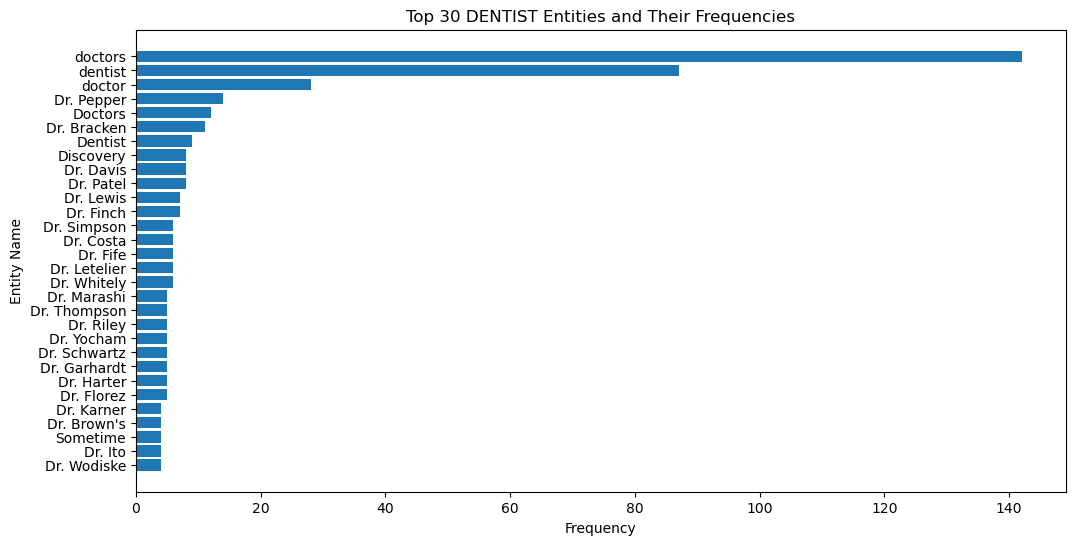


**********************************************************************



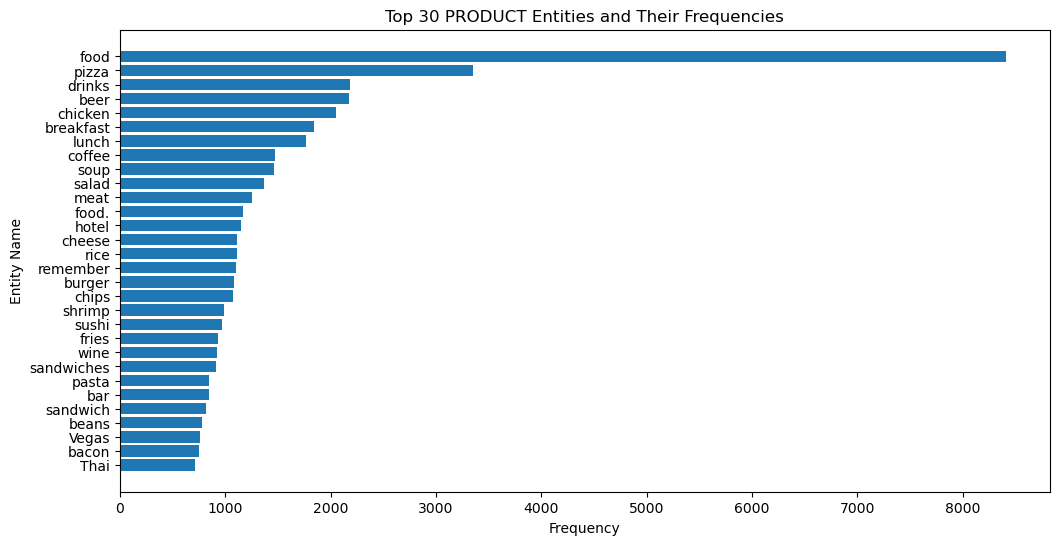


**********************************************************************



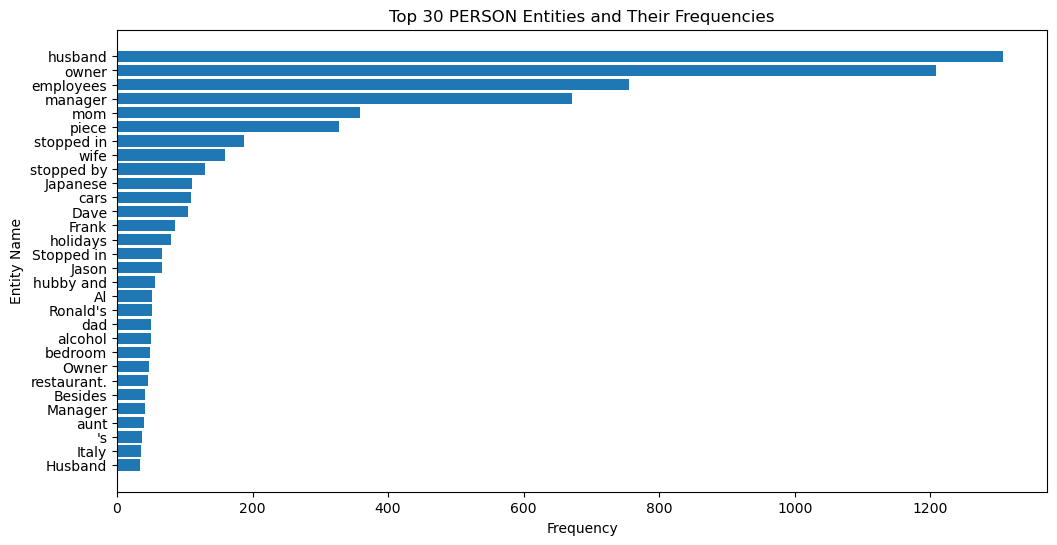


**********************************************************************



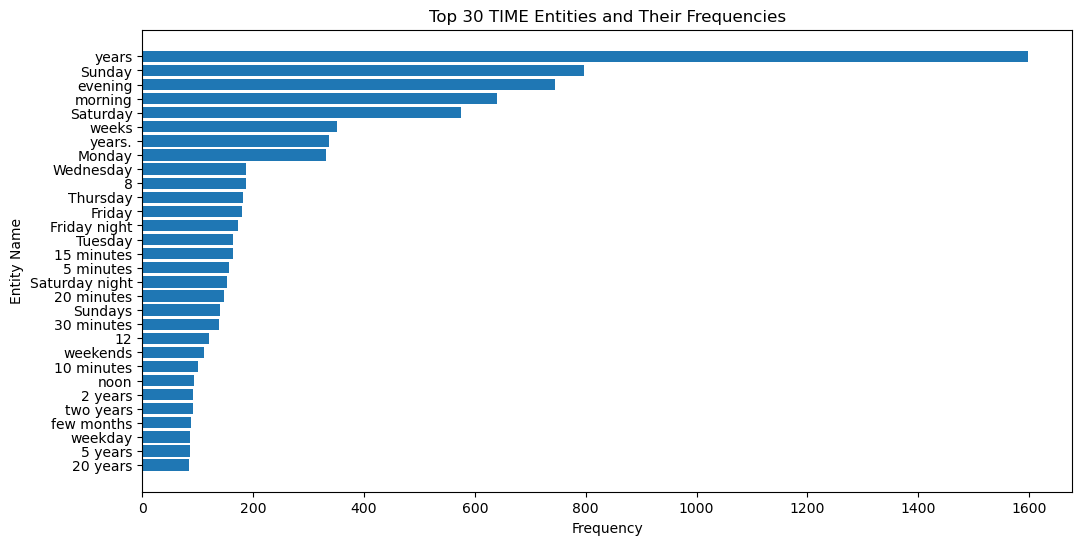


**********************************************************************



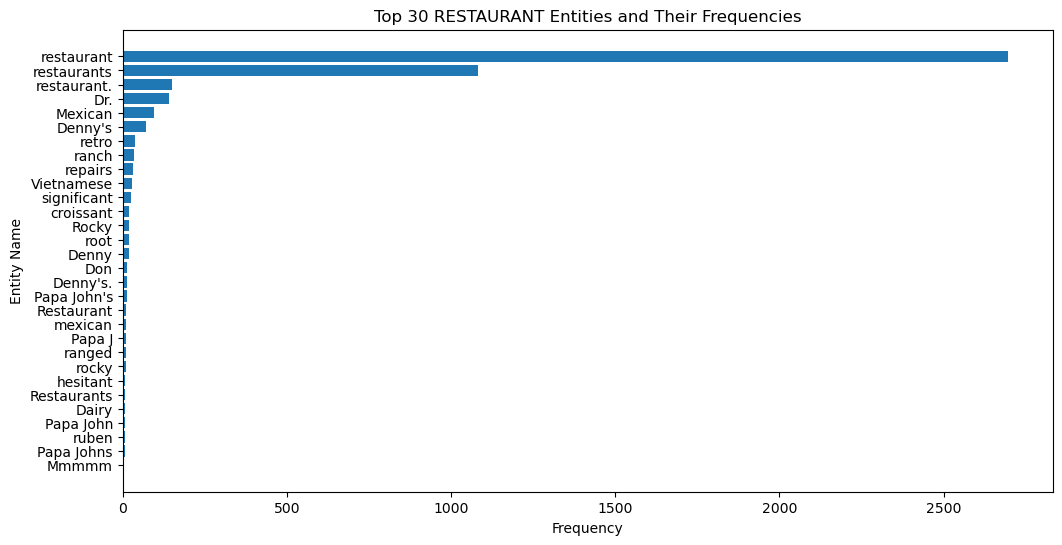


**********************************************************************



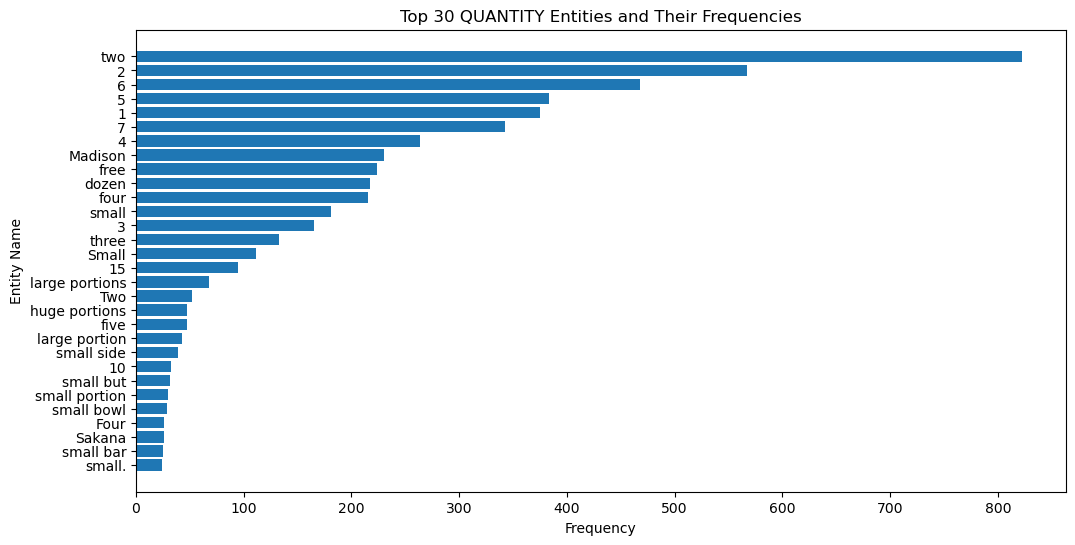


**********************************************************************



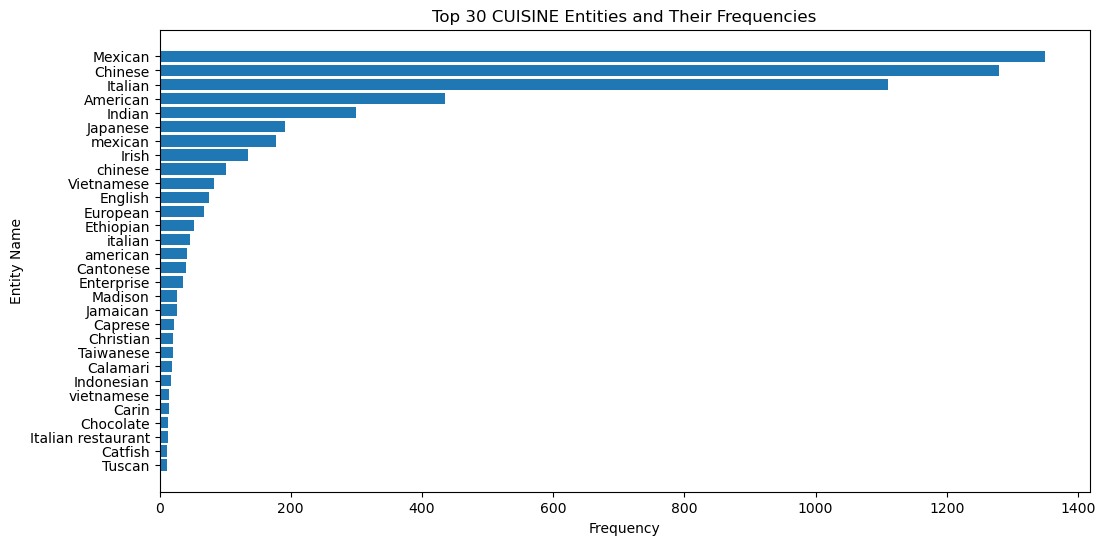


**********************************************************************



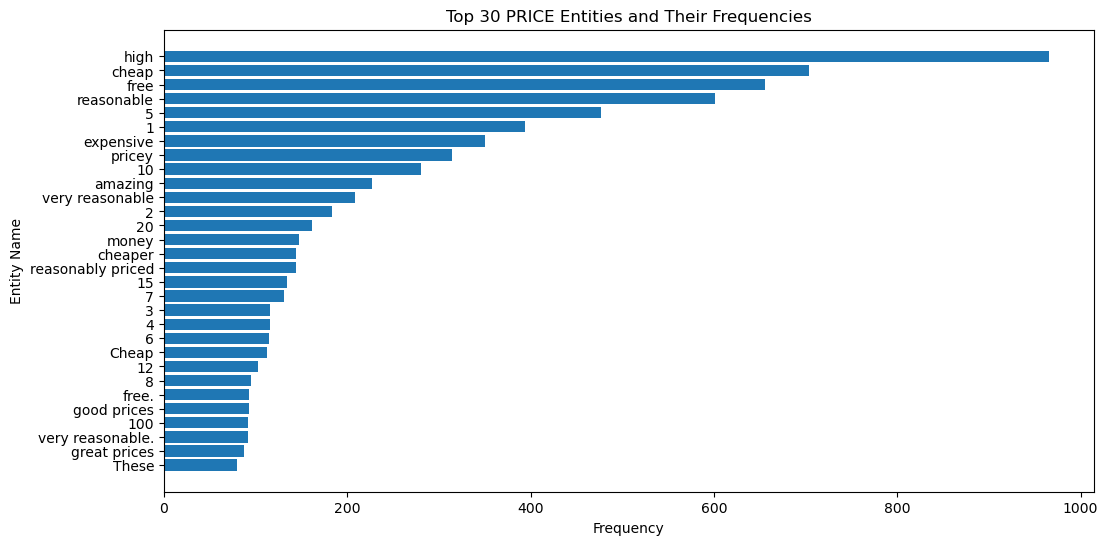


**********************************************************************



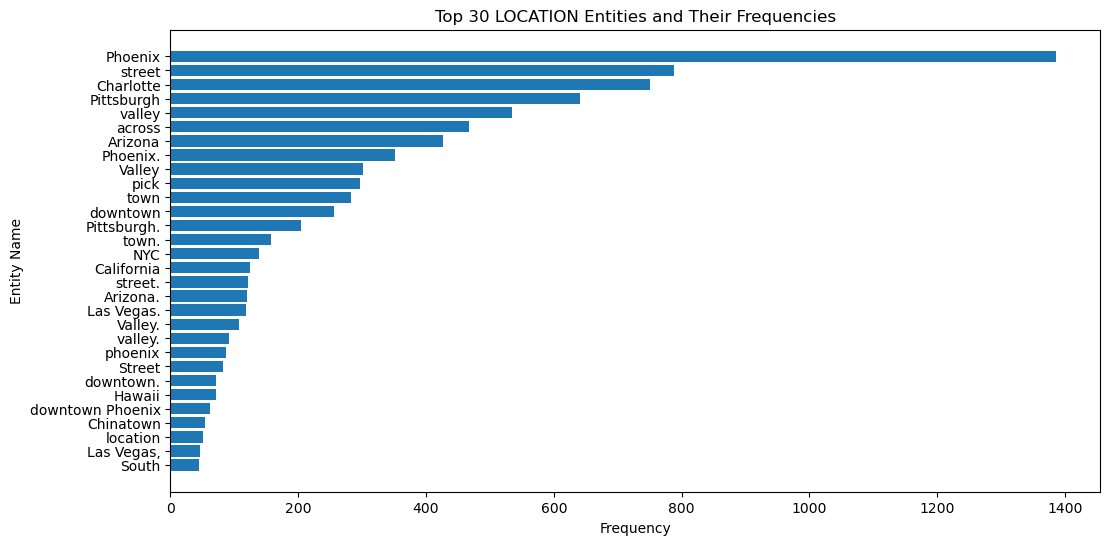


**********************************************************************



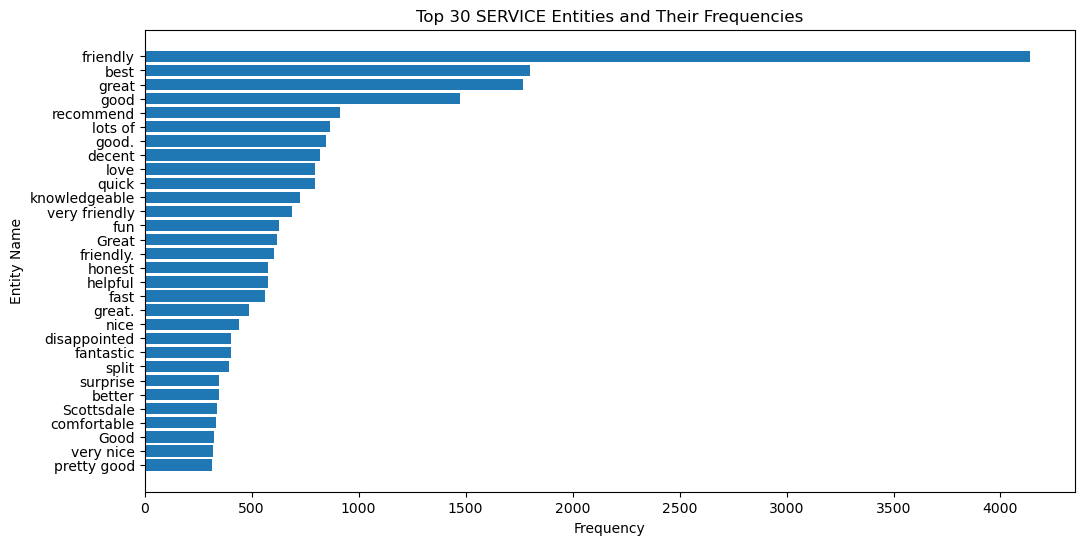


**********************************************************************



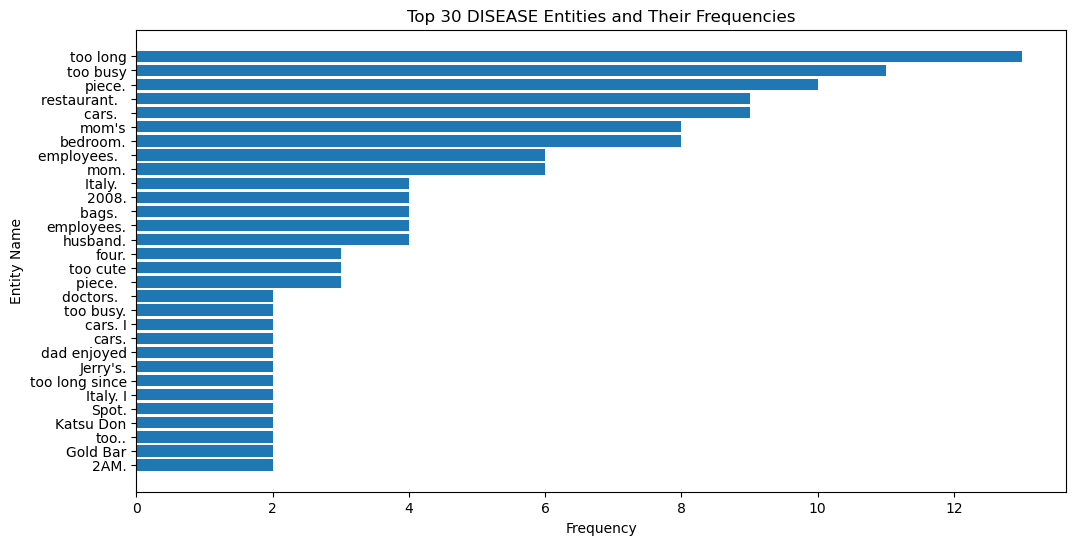


**********************************************************************



In [61]:
for i in classes_list:
  plot_top_entities(top_entities_positive, entity_counts_positive, i, num_entities=30)
  print("\n**********************************************************************\n")

###### Tables

In [62]:
for i in classes_list:
  table_df_positive = get_top_entities_table(top_entities_positive, entity_counts_positive, i, num_entities=30)
  print(table_df_positive)
  print("-----------------------------------------------------------------------")

       Entity Name  Frequency
0             Yelp        941
1             yelp        351
2           Subway        112
3          company        101
4         Paradise         84
5          Walmart         77
6            Steve         74
7       McDonald's         65
8        Taco Bell         61
9      Los Angeles         59
10            Bell         56
11      Grimaldi's         55
12               %         53
13           Foods         51
14        la carte         48
15          Yelper         40
16       Obviously         40
17         alcohol         38
18          insane         36
19          subway         36
20         Besides         35
21        Japanese         34
22            YELP         32
23           State         31
24        Pamela's         29
25  Humane Society         22
26          Jack's         21
27     Pane Bianco         21
28           Brian         20
29       taco bell         20
----------------------------------------------------------------------

##### Negative EDA

In [63]:
text_column_negative = train_df[train_df["label"] == 0]["text"]
top_entities_negative, entity_counts_negative = extract_named_entities(text_column_negative)

###### PLOTS

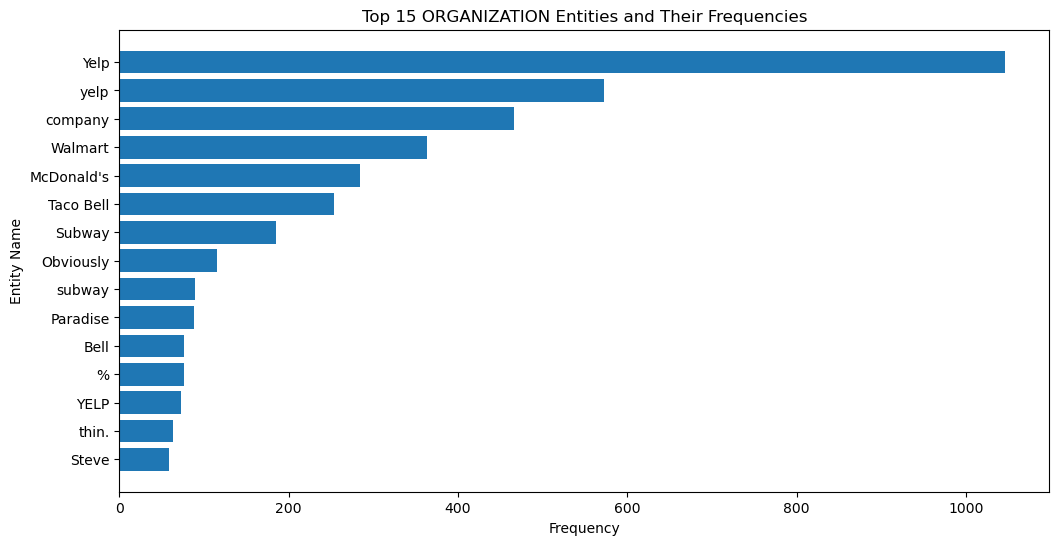


**********************************************************************



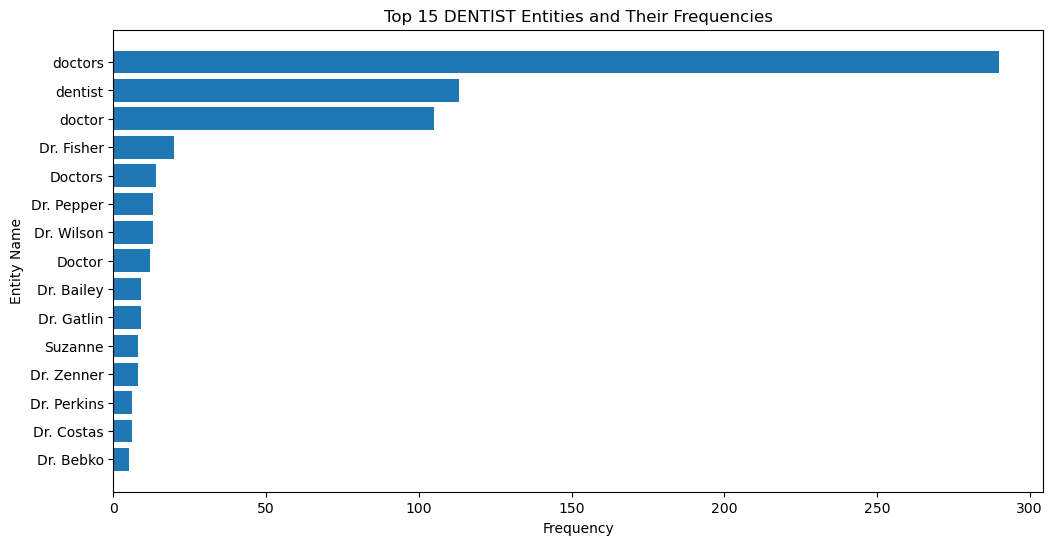


**********************************************************************



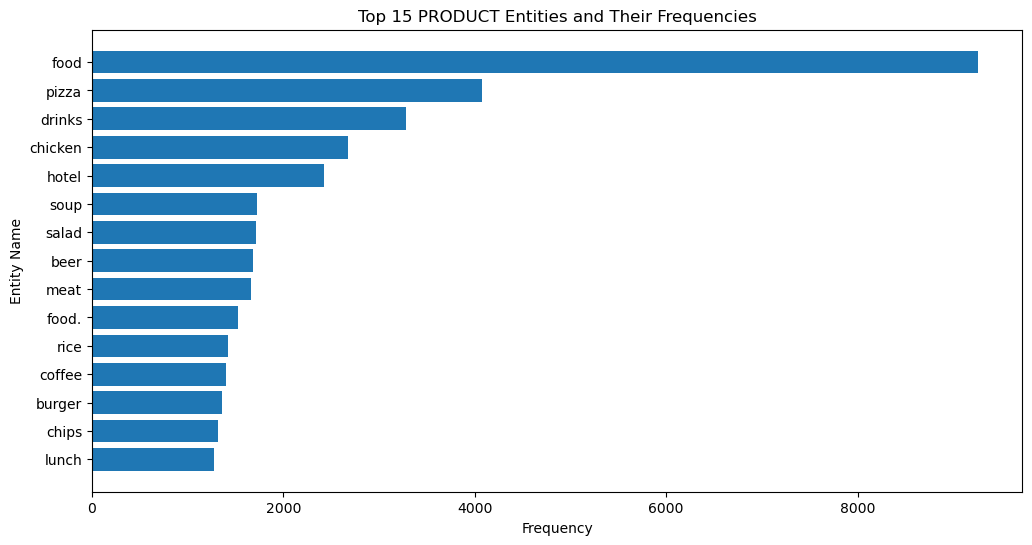


**********************************************************************



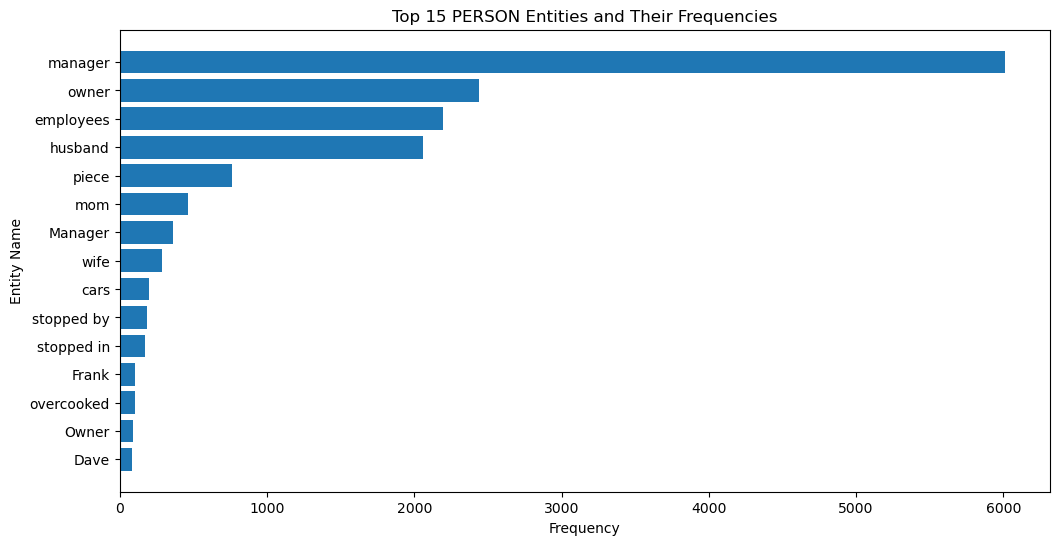


**********************************************************************



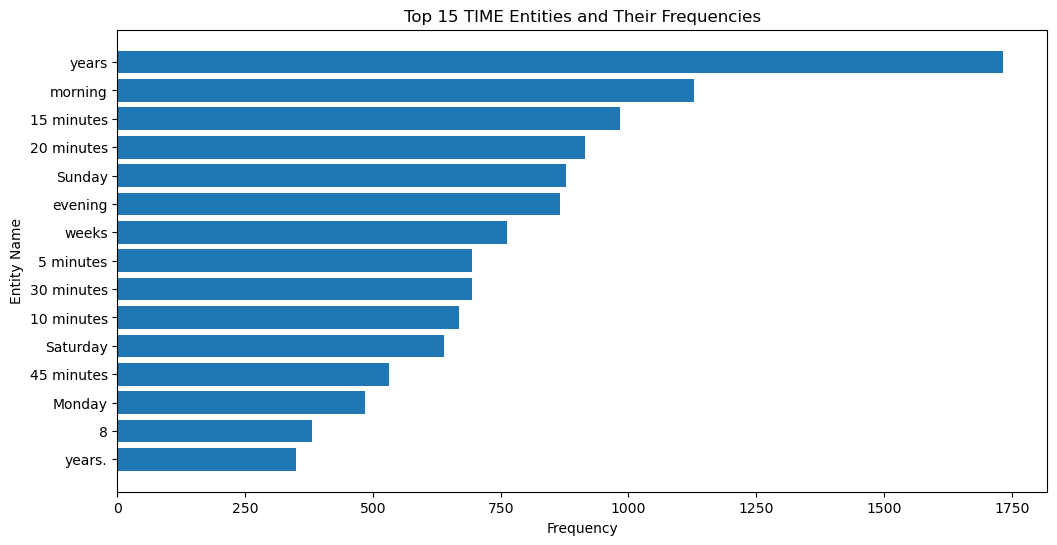


**********************************************************************



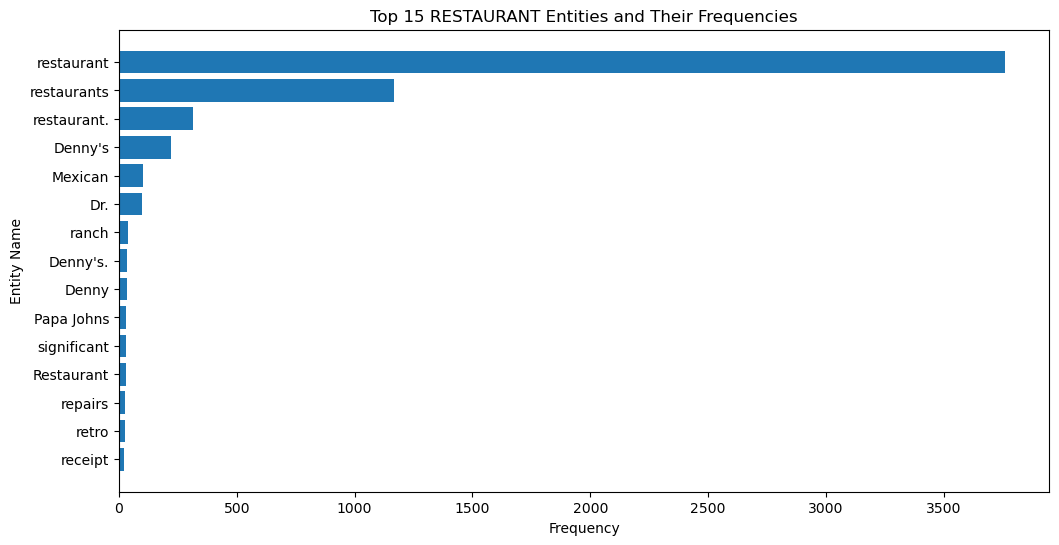


**********************************************************************



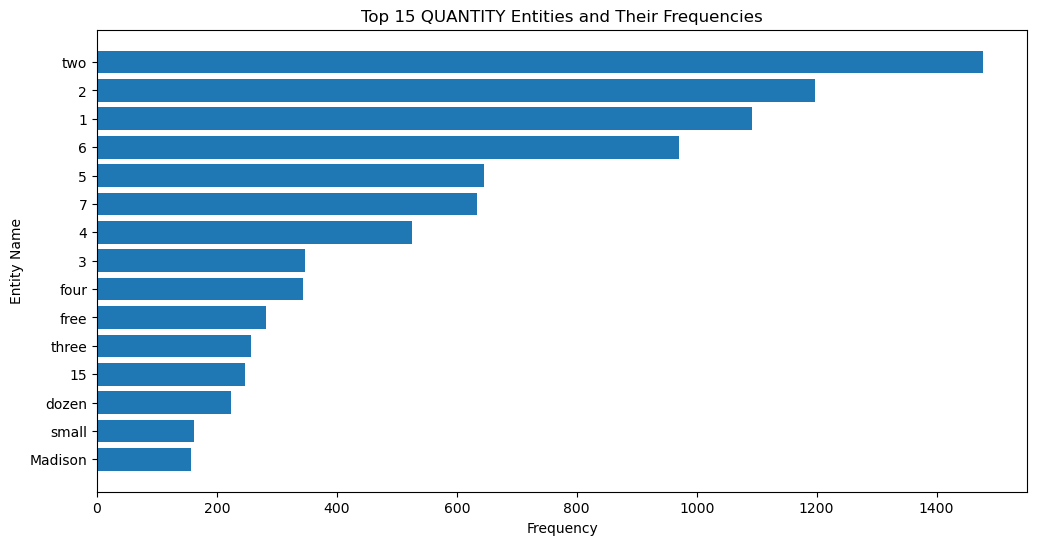


**********************************************************************



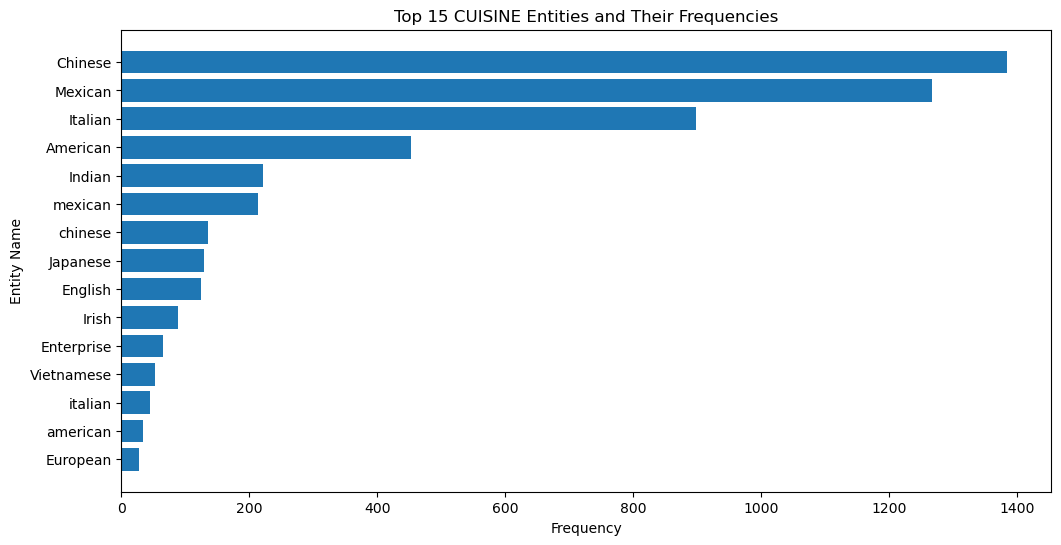


**********************************************************************



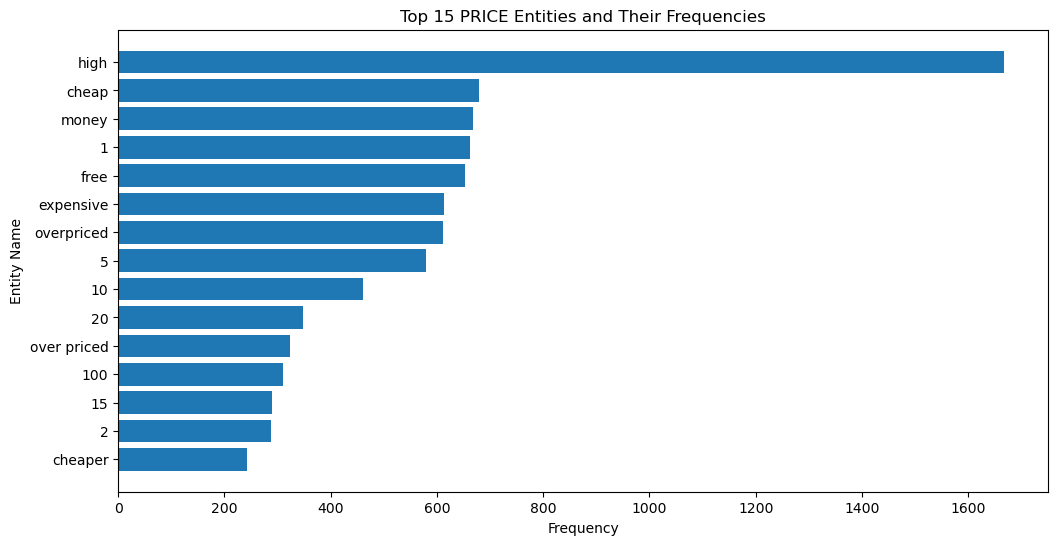


**********************************************************************



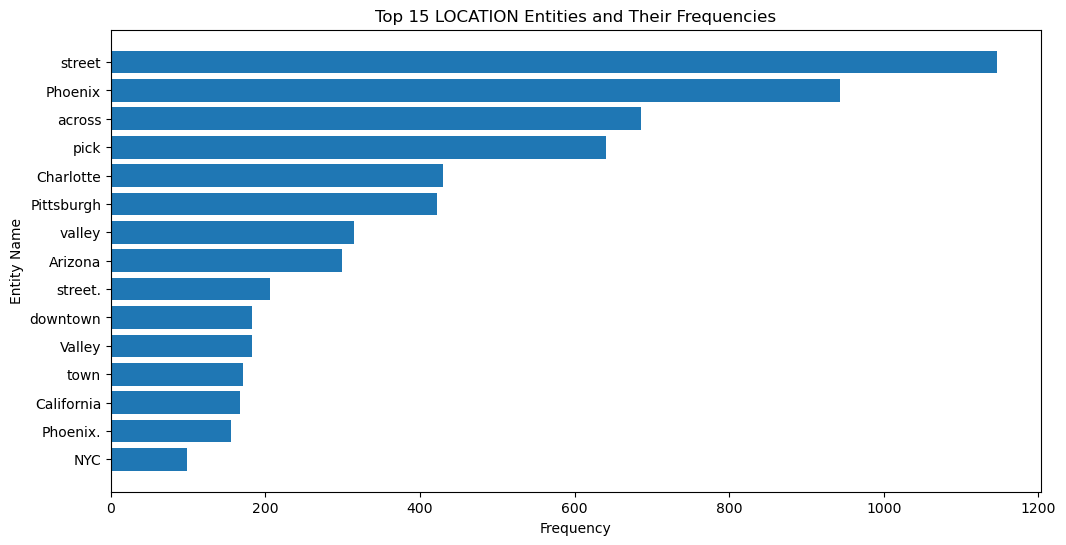


**********************************************************************



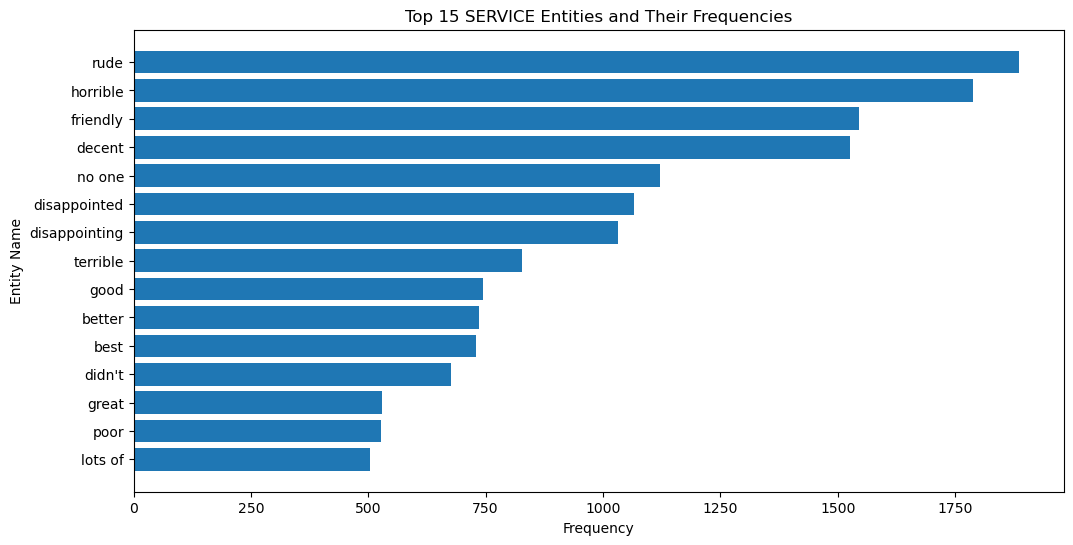


**********************************************************************



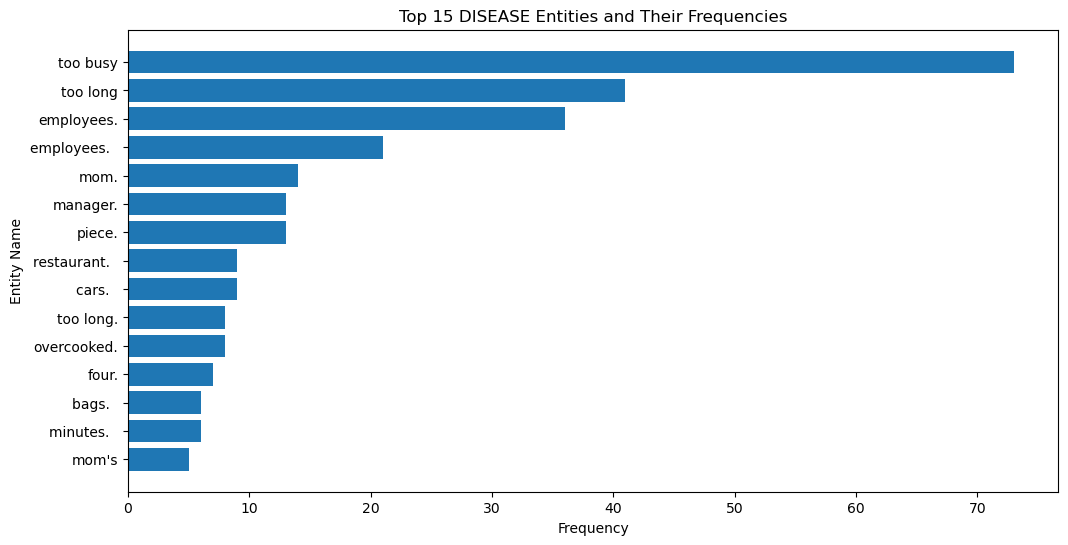


**********************************************************************



In [64]:
for i in classes_list:
  plot_top_entities(top_entities_negative, entity_counts_negative, i, num_entities=15)
  print("\n**********************************************************************\n")

###### Tables

In [65]:
for i in classes_list:
  table_df_negative = get_top_entities_table(top_entities_negative, entity_counts_negative, i, num_entities=15)
  print(table_df_negative)
  print("-----------------------------------------------------------------------")

   Entity Name  Frequency
0         Yelp       1046
1         yelp        572
2      company        466
3      Walmart        363
4   McDonald's        284
5    Taco Bell        254
6       Subway        185
7    Obviously        115
8       subway         90
9     Paradise         88
10        Bell         76
11           %         76
12        YELP         73
13       thin.         64
14       Steve         59
-----------------------------------------------------------------------
    Entity Name  Frequency
0       doctors        290
1       dentist        113
2        doctor        105
3    Dr. Fisher         20
4       Doctors         14
5    Dr. Pepper         13
6    Dr. Wilson         13
7        Doctor         12
8    Dr. Bailey          9
9    Dr. Gatlin          9
10      Suzanne          8
11   Dr. Zenner          8
12  Dr. Perkins          6
13   Dr. Costas          6
14    Dr. Bebko          5
-----------------------------------------------------------------------
   Entit

###### All Tables

In [66]:
for i in classes_list:
  print(i, ": ")
  print("Overall",i,"in the dataset\n")
  print(get_top_entities_table(top_entities, entity_counts, i, num_entities=30))
  print("-----------------------------------------------------------------------")
  print("Positive",i,"in the dataset\n")
  print(get_top_entities_table(top_entities_positive, entity_counts_positive, i, num_entities=30))
  print("-----------------------------------------------------------------------")
  print("Negative",i,"in the dataset\n")
  print(get_top_entities_table(top_entities_negative, entity_counts_negative, i, num_entities=30))
  print("***********************************************************************")

ORGANIZATION : 
Overall ORGANIZATION in the dataset

    Entity Name  Frequency
0          Yelp        171
1          yelp         65
2    McDonald's         57
3       company         44
4      Pamela's         35
5     Taco Bell         30
6       Walmart         27
7         Foods         24
8        Subway         22
9   Time Warner         22
10      Zorba's         21
11    Obviously         15
12        thin.         14
13        Rusty         13
14       insane         10
15  Los Angeles         10
16       Yelper          8
17      Germany          8
18     Paradise          8
19       subway          8
20     Japanese          8
21       Dick's          7
22         YELP          7
23      Gateway          7
24   Graziano's          7
25     la carte          6
26   Bruegger's          6
27      Besides          6
28      alcohol          5
29  ten minutes          5
-----------------------------------------------------------------------
Positive ORGANIZATION in the dataset



### Data Preprocessing and Transformation

In [50]:
maxlen = train_df['text'].apply(lambda x: len(x.split())).max()

In [51]:
def preprocess_text(text):
    text = text.lower()  # Converting to lowercase

    for punctuation in string.punctuation: # Removing punctuation symbols
        text = text.replace(punctuation, ' ')

    for digit in string.digits: # Removing numbers (digits)
        text = text.replace(digit, ' ')

    stop = set(stopwords.words('english')) # Removing stopwords
    words = text.split()
    words = [word for word in words if word not in stop]

    lemmatizer = WordNetLemmatizer() # Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]

    processed_text = ' '.join(words) # Joining words back into a single string

    return processed_text

In [52]:
train_df['text'] = train_df['text'].apply(preprocess_text)
test_df['text'] = test_df['text'].apply(preprocess_text)

In [53]:
train_df.head(10)

text  label
0  unfortunately frustration dr goldberg patient ...      0
1  going dr goldberg year think one st patient st...      1
2  know dr goldberg like moving arizona let tell ...      0
3  writing review give head see doctor office sta...      0
4  food great best thing wing wing simply fantast...      1
5  wing sauce like water pretty much lot butter h...      0
6  owning driving range inside city limit like li...      0
7  place absolute garbage half tee available incl...      0
8  finally made range heard thing people fine go ...      1
9  drove yesterday get sneak peak open july th wa...      1

In [55]:
test_df.head()

text  label
0  contrary review zero complaint service price g...      1
1  last summer appointment get new tire wait supe...      0
2  friendly staff starbucks fair get anywhere els...      1
3  food good unfortunately service hit miss main ...      0
4  even car filene basement worth bus trip waterf...      1

### Feature Engineering

In [68]:
train_df.head()

text  label
0  unfortunately frustration dr goldberg patient ...      0
1  going dr goldberg year think one st patient st...      1
2  know dr goldberg like moving arizona let tell ...      0
3  writing review give head see doctor office sta...      0
4  food great best thing wing wing simply fantast...      1

In [69]:
train_df['words_count'] = train_df['text'].apply(lambda x: len(x.split()))
train_df['character_count'] = train_df['text'].apply(len)
train_df['average_word_length'] = train_df['character_count'] / train_df['words_count']

In [70]:
train_df.head()

text  label  words_count  \
0  unfortunately frustration dr goldberg patient ...      0           52   
1  going dr goldberg year think one st patient st...      1           38   
2  know dr goldberg like moving arizona let tell ...      0           99   
3  writing review give head see doctor office sta...      0           94   
4  food great best thing wing wing simply fantast...      1           44   

   character_count  average_word_length  
0              359             6.903846  
1              243             6.394737  
2              639             6.454545  
3              636             6.765957  
4              258             5.863636

In [71]:
correlation_matrix = train_df[['label', 'character_count', 'words_count', 'average_word_length']].corr()
correlation_with_label = correlation_matrix['label'].sort_values(ascending=False)
correlation_with_label

# Correlation between these columns is very less, hence cannot be considered

label                  1.000000
average_word_length    0.023132
character_count       -0.145033
words_count           -0.146117
Name: label, dtype: float64

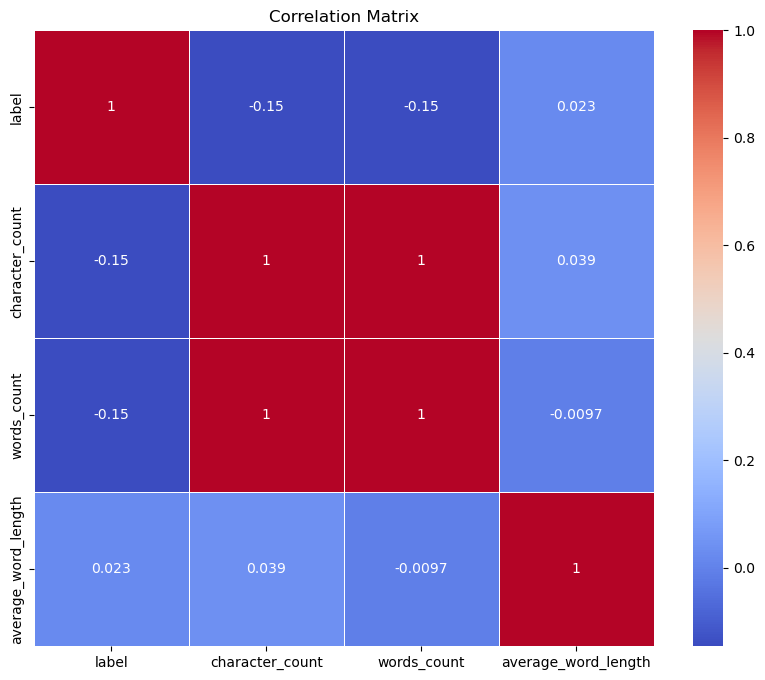

In [72]:
plt.figure(figsize=(10, 8)) # PLotting a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

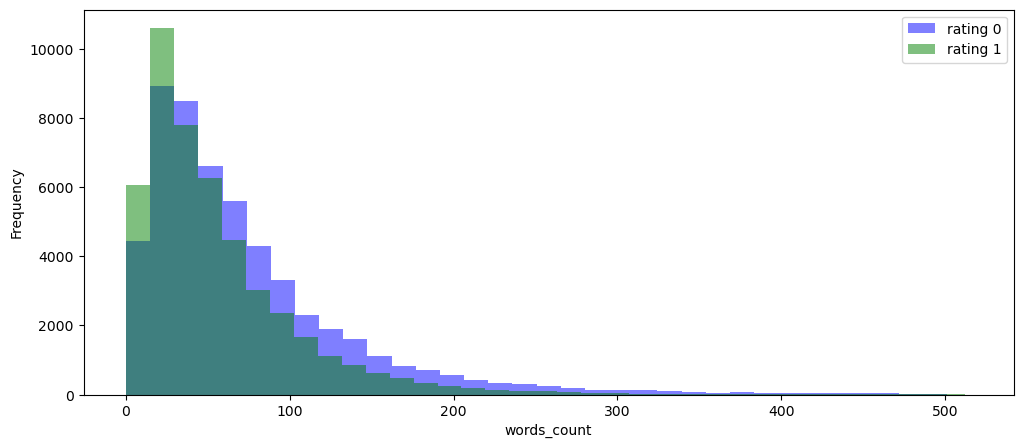

In [73]:
plt.figure(figsize=(12, 5))
train_df[train_df['label'] == 0]['words_count'].plot(bins=35, alpha=0.5, kind='hist', color='blue', label='rating 0') # Plotting histogram for 'label' 0 in blue
train_df[train_df['label'] == 1]['words_count'].plot(bins=35, alpha=0.5, kind='hist', color='green', label='rating 1') # Plotting the histogram for 'label' 1 in green

plt.legend()
plt.xlabel('words_count')
plt.show()

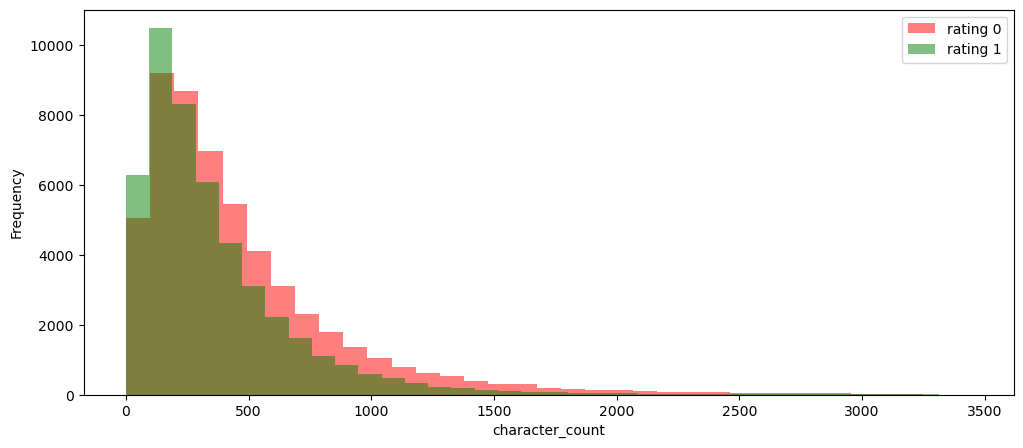

In [74]:
plt.figure(figsize=(12, 5))
train_df[train_df['label'] == 0]['character_count'].plot(bins=35, alpha=0.5, kind='hist', color='red', label='rating 0') # Plotting histogram for 'label' 0 in red
train_df[train_df['label'] == 1]['character_count'].plot(bins=35, alpha=0.5, kind='hist', color='green', label='rating 1') # Plotting histogram for 'label' 1 in green

plt.legend()
plt.xlabel('character_count')
plt.show()

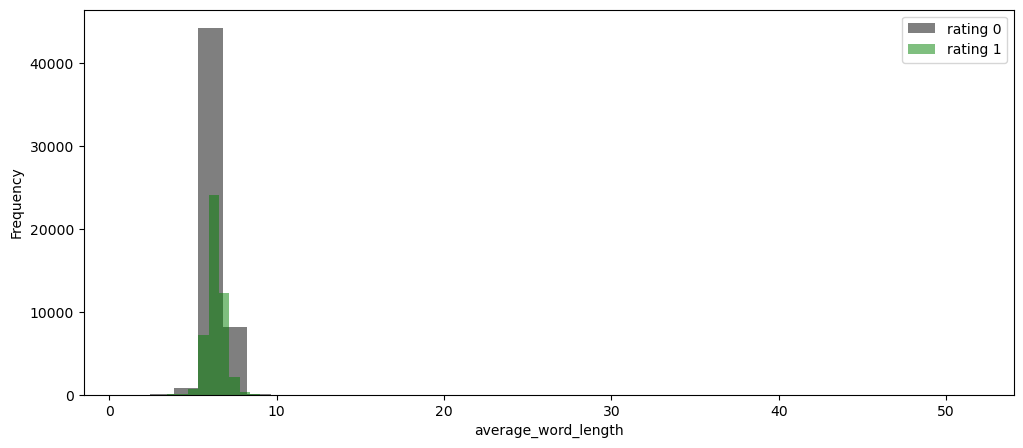

In [75]:
plt.figure(figsize=(12, 5))
train_df[train_df['label'] == 0]['average_word_length'].plot(bins=35, alpha=0.5, kind='hist', color='black', label='rating 0') # Plotting histogram for 'label' 0 in black
train_df[train_df['label'] == 1]['average_word_length'].plot(bins=35, alpha=0.5, kind='hist', color='green', label='rating 1') # Plotting histogram for 'label' 1 in green

plt.legend()
plt.xlabel('average_word_length')
plt.show()

In [76]:
train_df = train_df.drop(["words_count", "character_count", "average_word_length"], axis = 1)

In [77]:
# Tokenize the text
train_df['token'] = train_df['text'].apply(nltk.word_tokenize)

In [78]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english') # Creating TF-IDF vectorizer

In [79]:
tfidf_matrix = tfidf_vectorizer.fit_transform(train_df['text']) # Fitting and transforming text data to create the TF-IDF matrix

In [80]:
word_tfidf_scores = tfidf_matrix.sum(axis=0) # Summing TF-IDF scores for each word

In [81]:
feature_names = tfidf_vectorizer.get_feature_names_out() # Getting feature names (words)

In [82]:
word_tfidf_pairs = [(word, score) for word, score in zip(feature_names, word_tfidf_scores.tolist()[0])] # Creating list of word-TF-IDF score pairs

In [83]:
word_tfidf_pairs.sort(key=lambda x: x[1], reverse=True) # Sorting by TF-IDF score in descending order

In [84]:
top_30_words = word_tfidf_pairs[:30] # Getting top 30 words based on TF-IDF score

In [85]:
for word, score in top_30_words: # Printing top 30 words and their TF-IDF scores
    print(f'{word}: {score}')

food: 3188.1929202414008
place: 3023.2152948462053
good: 2713.6941610483677
great: 2444.925784801775
service: 2320.3457097139767
time: 2303.377850931074
like: 2057.1218411762493
really: 1550.7167864753578
order: 1326.922539032112
love: 1277.0258952917961
restaurant: 1275.0081621464665
got: 1248.0015438438845
best: 1243.5297678698394
pizza: 1235.5829249442288
price: 1226.4478770801725
staff: 1212.2306842016828
nice: 1204.0622776700177
ni: 1188.2507166823827
chicken: 1184.8066281852334
went: 1121.1579658335793
people: 1097.4307439379209
come: 1090.9199163140386
ordered: 1070.138729985725
friendly: 1063.3329081556676
make: 1062.8317252693025
better: 1057.7458705152742
going: 1045.726506142463
customer: 1034.608052017542
nthe: 1032.8353204766413
day: 1031.8084855261225


## Implementing Embedding Layer

In [86]:
train_df.head()

text  label  \
0  unfortunately frustration dr goldberg patient ...      0   
1  going dr goldberg year think one st patient st...      1   
2  know dr goldberg like moving arizona let tell ...      0   
3  writing review give head see doctor office sta...      0   
4  food great best thing wing wing simply fantast...      1   

                                               token  
0  [unfortunately, frustration, dr, goldberg, pat...  
1  [going, dr, goldberg, year, think, one, st, pa...  
2  [know, dr, goldberg, like, moving, arizona, le...  
3  [writing, review, give, head, see, doctor, off...  
4  [food, great, best, thing, wing, wing, simply,...

In [87]:
classes_list = ["ORGANIZATION", "DENTIST", "PRODUCT", "PERSON", "TIME", "RESTAURANT", "QUANTITY", "CUISINE", "PRICE", "LOCATION", "SERVICE", "DISEASE"]
classes_list

['ORGANIZATION',
 'DENTIST',
 'PRODUCT',
 'PERSON',
 'TIME',
 'RESTAURANT',
 'QUANTITY',
 'CUISINE',
 'PRICE',
 'LOCATION',
 'SERVICE',
 'DISEASE']

In [88]:
nlp2 = spacy.load(r"C:\Users\urvas\Projects\NLP Project\Yelp Review Classification using NLP\Project")
print(nlp2)

In [89]:
with open('annotations.json', 'r') as file: # labelled 500 reviews
    df = json.load(file)   # Custom NER mdoel
df['annotations'][:5]

[['"Unfortunately, the frustration of being Dr. Goldberg\'s patient is a repeat of the experience I\'ve had with so many other doctors in NYC -- good doctor, terrible staff.  It seems that his staff simply never answers the phone.  It usually takes 2 hours of repeated calling to get an answer.  Who has time for that or wants to deal with it?  I have run into this problem with many other doctors and I just don\'t get it.  You have office workers, you have patients with medical needs, why isn\'t anyone answering the phone?  It\'s incomprehensible and not work the aggravation.  It\'s with regret that I feel that I have to give Dr. Goldberg 2 stars."',
  {'entities': [[41, 53, 'DENTIST'],
    [122, 129, 'ORGANIZATION'],
    [133, 136, 'LOCATION'],
    [153, 168, 'SERVICE'],
    [244, 251, 'TIME'],
    [385, 392, 'DENTIST'],
    [623, 635, 'DENTIST']]}],
 ['"Been going to Dr. Goldberg for over 10 years. I think I was one of his 1st patients when he started at MHMG. He\'s been great over the

### Word2Vec

In [90]:
word2vec_model = Word2Vec(sentences=train_df['token'], vector_size=100, window=5, min_count=1, sg=1, workers=4) # Training Word2Vec model
save_dir = 'word2vec_model' # Specifying directory where you want to save the Word2Vec model

os.makedirs(save_dir, exist_ok=True) # Creating directory if it doesn't exist

model_path = os.path.join(save_dir, 'word2vec.model') # Saving Word2Vec model in the specified location
word2vec_model.save(model_path)

print("Word2Vec word vectors trained and saved in:", model_path)

Word2Vec word vectors trained and saved in: word2vec_model\word2vec.model


In [91]:
model_path = 'word2vec_model\word2vec.model'  # Loading trained Word2Vec model
word2vec_model = Word2Vec.load(model_path)

In [92]:
def find_similar_words(word, topn=10):
    similar_words = word2vec_model.wv.most_similar(positive=[word], topn=topn)
    return similar_words

In [93]:
for word in top_30_words: # Comparing words similar to the top 15 most frequent words
    similar_words = find_similar_words(word)
    print(f"Words similar to '{word}':")
    for similar_word, score in similar_words:
        print(f"{similar_word}: {score}")
    print()

Words similar to '('food', 3188.1929202414008)':
nfood: 0.7655797600746155
quickness: 0.7579525113105774
ntaste: 0.7577388286590576
nsushi: 0.750663697719574
unauthentic: 0.7455082535743713
sevice: 0.7434446811676025
nmeal: 0.7426625490188599
restraunt: 0.7355560064315796
sarku: 0.7342783808708191
meal: 0.733653724193573

Words similar to '('place', 3023.2152948462053)':
joint: 0.8135743141174316
pittsburg: 0.8073641061782837
paisan: 0.805942952632904
restaraunt: 0.8037369847297668
alessia: 0.797459602355957
restaurant: 0.7972829937934875
esquire: 0.787712037563324
ishi: 0.7874152064323425
nico: 0.7861822843551636
prolly: 0.7848691940307617

Words similar to '('good', 2713.6941610483677)':
decent: 0.8821098208427429
great: 0.8691345453262329
alright: 0.8145377039909363
excellent: 0.8053471446037292
ehhh: 0.8030297756195068
awesome: 0.7960357666015625
darned: 0.789857804775238
tasty: 0.7875329256057739
ndelicious: 0.7840088605880737
phenom: 0.782782256603241

Words similar to '('great',

### GloVe

In [94]:
file_path = 'GloVE Files\glove.6B.100d.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    for i, line in enumerate(file):
        if i < 10:  # Print the first 10 lines
            print(line)
        else:
            break

the -0.038194 -0.24487 0.72812 -0.39961 0.083172 0.043953 -0.39141 0.3344 -0.57545 0.087459 0.28787 -0.06731 0.30906 -0.26384 -0.13231 -0.20757 0.33395 -0.33848 -0.31743 -0.48336 0.1464 -0.37304 0.34577 0.052041 0.44946 -0.46971 0.02628 -0.54155 -0.15518 -0.14107 -0.039722 0.28277 0.14393 0.23464 -0.31021 0.086173 0.20397 0.52624 0.17164 -0.082378 -0.71787 -0.41531 0.20335 -0.12763 0.41367 0.55187 0.57908 -0.33477 -0.36559 -0.54857 -0.062892 0.26584 0.30205 0.99775 -0.80481 -3.0243 0.01254 -0.36942 2.2167 0.72201 -0.24978 0.92136 0.034514 0.46745 1.1079 -0.19358 -0.074575 0.23353 -0.052062 -0.22044 0.057162 -0.15806 -0.30798 -0.41625 0.37972 0.15006 -0.53212 -0.2055 -1.2526 0.071624 0.70565 0.49744 -0.42063 0.26148 -1.538 -0.30223 -0.073438 -0.28312 0.37104 -0.25217 0.016215 -0.017099 -0.38984 0.87424 -0.72569 -0.51058 -0.52028 -0.1459 0.8278 0.27062

, -0.10767 0.11053 0.59812 -0.54361 0.67396 0.10663 0.038867 0.35481 0.06351 -0.094189 0.15786 -0.81665 0.14172 0.21939 0.58505 -0.52158

In [95]:
# Path to the GloVe vectors file
glove_input_file = 'GloVE Files\glove.6B.100d.txt'

# Loading converted Word2Vec format file
glove_model = KeyedVectors.load_word2vec_format(glove_input_file, binary=False, no_header=True)

In [96]:
# Function to find similar words to a given word
def find_similar_words_glove(word):
    try:
        similar_words = glove_model.most_similar(positive=[word], topn=10)
        return similar_words
    except KeyError:
        print(f"Word '{word}' is not present in the vocabulary.")
        return []

In [97]:
for word in top_30_words:
    similar_words = find_similar_words_glove(word)
    print(f"Words similar to '{word}':")
    for similar_word, score in similar_words:
        print(f"{similar_word}: {score}")
    print()

Words similar to '('food', 3188.1929202414008)':
foods: 0.7469059824943542
supplies: 0.7264691591262817
products: 0.7225049138069153
meat: 0.7138239145278931
supply: 0.6732637882232666
feed: 0.6704155206680298
medicines: 0.6687097549438477
meals: 0.6630422472953796
coffee: 0.6627735495567322
goods: 0.6610530614852905

Words similar to '('place', 3023.2152948462053)':
time: 0.8073682188987732
only: 0.7945239543914795
one: 0.7850687503814697
take: 0.7836618423461914
next: 0.7802186012268066
this: 0.7796396613121033
the: 0.7717800140380859
places: 0.769711434841156
where: 0.7651147246360779
spot: 0.7642979025840759

Words similar to '('good', 2713.6941610483677)':
better: 0.893191397190094
sure: 0.8314563035964966
really: 0.8297762274742126
kind: 0.8288268446922302
very: 0.8260800242424011
we: 0.8234356045722961
way: 0.8215398192405701
think: 0.8205099105834961
thing: 0.8171301484107971
're: 0.8141680955886841

Words similar to '('great', 2444.925784801775)':
greatest: 0.7882647514343262


### FastText

In [98]:
fasttext_model = FastText(sentences=train_df['token'], vector_size=100, window=5, min_count=1, sg=0, workers=4) 
save_dir = 'fasttext_model' 
os.makedirs(save_dir, exist_ok=True) 
model_path = os.path.join(save_dir, 'fasttext.model') 
fasttext_model.save(model_path)
print("FastText word vectors trained and saved in:", model_path)

FastText word vectors trained and saved in: fasttext_model\fasttext.model


In [99]:
model_path = 'fasttext_model/fasttext.model' 
fasttext_model = FastText.load(model_path)

In [100]:
def find_similar_words_fasttext(word, topn=10):
    similar_words = fasttext_model.wv.most_similar(positive=[word], topn=topn)
    return similar_words

In [101]:
for word in top_30_words:  
    similar_words = find_similar_words_fasttext(word)
    print(f"Words similar to '{word}':")
    for similar_word, similarity in similar_words:
        print(f"{similar_word}: {similarity}")
    print()

Words similar to '('food', 3188.1929202414008)':
efood: 0.9539448022842407
ffood: 0.9531961679458618
foodgasm: 0.9288710951805115
syscofood: 0.9197799563407898
foood: 0.9148328304290771
fooood: 0.8747757077217102
petfood: 0.8673349618911743
foodstamps: 0.8622946739196777
catfood: 0.8617318272590637
junkfood: 0.8581101894378662

Words similar to '('place', 3023.2152948462053)':
pplace: 0.9020088911056519
nplace: 0.8569873571395874
placees: 0.8540016412734985
towmplace: 0.8479095101356506
thismplace: 0.8426848649978638
placebo: 0.8374128341674805
kidsplace: 0.8339638710021973
anyplace: 0.8215484023094177
townplace: 0.8140634894371033
placer: 0.8025695085525513

Words similar to '('good', 2713.6941610483677)':
mmmgood: 0.8948495388031006
goood: 0.8877384662628174
goodddddd: 0.8695394396781921
goodl: 0.8651787042617798
nygood: 0.8577614426612854
decent: 0.8462129235267639
gooood: 0.8441607356071472
goodonya: 0.8392951488494873
gooodd: 0.8303934335708618
havegood: 0.824835479259491

Words s

### Cosine Similarity between Word2Vec, GloVe, FastText

In [102]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_similarity(word, word_vectors_model1, word_vectors_model2, word_vectors_model3):
    try:
        major_1 = word_vectors_model1.wv[word].reshape(1, -1)
        similar_word_word2vec = find_similar_words(word)[0][0]
        vector1 = word_vectors_model1.wv[similar_word_word2vec].reshape(1, -1)
        
        major_2 = word_vectors_model2[word].reshape(1, -1)  
        similar_word_glove = find_similar_words_glove(word)[0][0]
        vector2 = word_vectors_model2[similar_word_glove].reshape(1, -1)
        
        major_3 = word_vectors_model3.wv[word].reshape(1, -1)
        similar_word_fasttext = find_similar_words_fasttext(word)[0][0]
        vector3 = word_vectors_model3.wv[similar_word_fasttext].reshape(1, -1)

        similarity_model1 = cosine_similarity(vector1, major_1)[0][0]
        similarity_model2 = cosine_similarity(vector2, major_2)[0][0]
        similarity_model3 = cosine_similarity(vector3, major_3)[0][0]
        
        print("Embeddding Vector of Good: ")
        print("word2vec_model: ", major_1)
        print()
        print("glove_model: ", major_2)
        print()
        print("fasttext_model: ", major_3)
        
        print()
        print()
        
        print("Embeddding Vector of similar words to Good: ")
        print("word2vec_model: ", vector1)
        print()
        print("glove_model: ", vector2)
        print()
        print("fasttext_model: ", vector3)
        print("\n")
        return similarity_model1, similarity_model2, similarity_model3
    except KeyError:
        print(f"Word '{word}' is not present in one or more of the models.")
        return None, None, None

In [103]:
top_30_words

[('food', 3188.1929202414008),
 ('place', 3023.2152948462053),
 ('good', 2713.6941610483677),
 ('great', 2444.925784801775),
 ('service', 2320.3457097139767),
 ('time', 2303.377850931074),
 ('like', 2057.1218411762493),
 ('really', 1550.7167864753578),
 ('order', 1326.922539032112),
 ('love', 1277.0258952917961),
 ('restaurant', 1275.0081621464665),
 ('got', 1248.0015438438845),
 ('best', 1243.5297678698394),
 ('pizza', 1235.5829249442288),
 ('price', 1226.4478770801725),
 ('staff', 1212.2306842016828),
 ('nice', 1204.0622776700177),
 ('ni', 1188.2507166823827),
 ('chicken', 1184.8066281852334),
 ('went', 1121.1579658335793),
 ('people', 1097.4307439379209),
 ('come', 1090.9199163140386),
 ('ordered', 1070.138729985725),
 ('friendly', 1063.3329081556676),
 ('make', 1062.8317252693025),
 ('better', 1057.7458705152742),
 ('going', 1045.726506142463),
 ('customer', 1034.608052017542),
 ('nthe', 1032.8353204766413),
 ('day', 1031.8084855261225)]

In [104]:
top_30_words_cosine = [item[0] for item in top_30_words]
top_30_words_cosine = [word for word in top_30_words_cosine if word != 'nthe']
top_30_words_cosine

['food',
 'place',
 'good',
 'great',
 'service',
 'time',
 'like',
 'really',
 'order',
 'love',
 'restaurant',
 'got',
 'best',
 'pizza',
 'price',
 'staff',
 'nice',
 'ni',
 'chicken',
 'went',
 'people',
 'come',
 'ordered',
 'friendly',
 'make',
 'better',
 'going',
 'customer',
 'day']

In [105]:
print("Cosine Similarity: ", calculate_cosine_similarity("good", word2vec_model, glove_model, fasttext_model))

Embeddding Vector of Good: 
word2vec_model:  [[-9.45388898e-02  4.53635752e-02  1.91298008e-01 -9.43310559e-02
   4.32465285e-01 -1.14561372e-01  4.44125593e-01  6.98595881e-01
  -5.57492018e-01 -4.33802247e-01  6.48784116e-02 -4.08508480e-01
  -2.40029648e-01  1.44255161e-01 -8.36835504e-02 -2.14847043e-01
   2.93924749e-01 -3.03472191e-01 -1.06883466e-01 -2.83919517e-02
   3.40569198e-01  1.23063296e-01  1.59508929e-01  5.78798689e-02
   3.87117028e-01  1.87480717e-03 -2.85196095e-03 -1.74013138e-01
  -1.89828604e-01  2.18331232e-03  1.15985386e-01 -8.83653462e-02
   1.12264276e-01 -5.95443547e-01 -2.61320710e-01  2.81945109e-01
   4.16260958e-02 -5.27898014e-01  1.32137269e-01 -3.16321582e-01
   2.69219726e-01 -4.42749947e-01  2.48289585e-01  2.86474079e-01
   2.91547954e-01 -2.56674260e-01 -1.99796811e-01 -1.59175456e-01
   1.73459321e-01  1.71999037e-02  3.02792579e-01 -3.00471373e-02
   4.32197563e-02 -3.81383687e-01 -4.11671549e-01  7.63320997e-02
   3.31937492e-01  1.14648538e-